In [482]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import sklearn.linear_model as sk
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import random

### READING THE DATA

In [483]:
runtime = pd.read_csv("sgemm_product.csv")
runtime.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [484]:
runtime['intercept']=1
#runtime.describe
#Creating average of all the four runtimes
runtime["runavg"] = (runtime["Run1 (ms)"]+runtime["Run2 (ms)"]+runtime["Run3 (ms)"]+runtime["Run4 (ms)"])/4
#norm_data_run= scaler.fit_transform(runavg)
runtime=runtime.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
runtime.head()
runtime2=runtime
runtime3=runtime

### Normalizing the entire data

In [485]:
scaler = StandardScaler() 
norm_data_full= scaler.fit_transform(runtime)

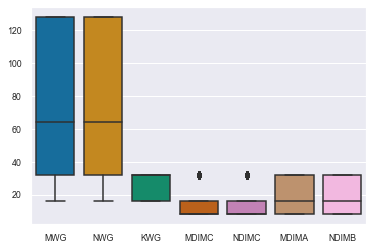

In [486]:
temp=runtime.drop(['intercept','runavg','KWI','VWM','VWN','STRM','STRN','SA','SB'],axis=1)
temp.head()
boxplot=sns.boxplot(data = temp ,palette="colorblind")
#sns.swarmplot(data = temp,color=".25")# palette="colorblind")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002198667CC18>,
      dtype=object)

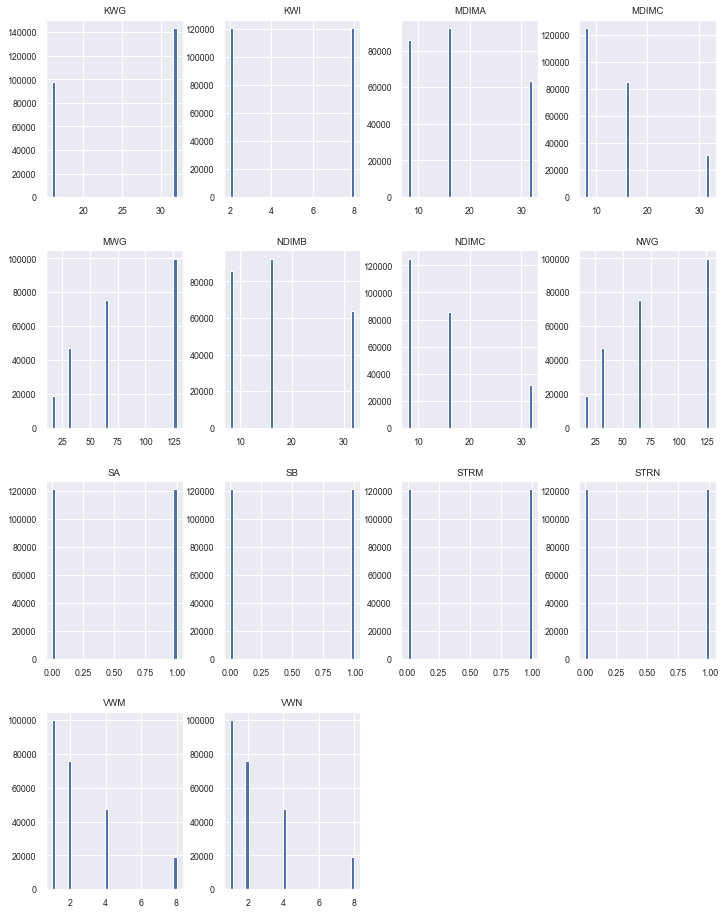

In [487]:
runtime.drop(['intercept','runavg'],axis=1).hist(bins = 40 , figsize= (12,16))

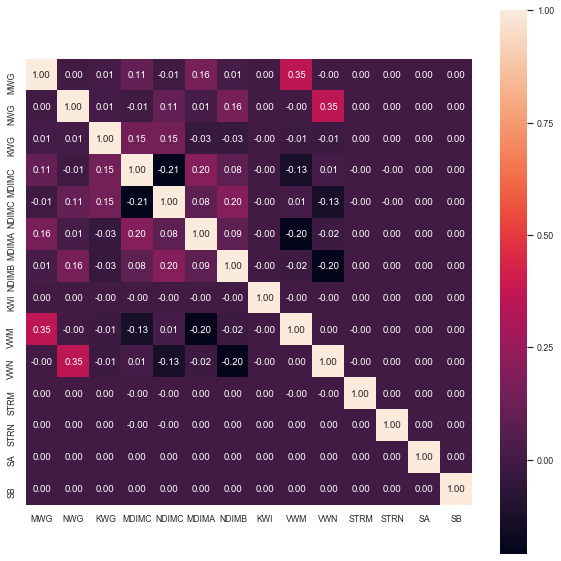

In [488]:
col = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
      'VWN', 'STRM', 'STRN', 'SA', 'SB']
run_co=runtime.iloc[:,0:14]
corr=run_co.corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=0.8)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show()

In [489]:
#col = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
#       'VWN', 'STRM', 'STRN', 'SA', 'SB']
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(runtime[col])
#plt.show()

In [490]:
#Independent variables Matrix
x=runtime.iloc[:,0:15]
xd = np.array(x)
x=xd[:,0:15]
x.shape

(241600, 15)

In [491]:
#matrix for dependent variable
runs = runtime["runavg"]
run=np.array(runs).reshape([-1,1])
run.shape
#Standardizing the data
scaler = StandardScaler() 
norm_x=scaler.fit_transform(x)
norm_y=scaler.fit_transform(run)
norm_y.shape

(241600, 1)

## Splitting data into train and test

In [492]:
#Splitting the datset, into train and test
x_train, x_test, y_train, y_test=train_test_split(norm_x, norm_y, train_size=0.70,test_size=0.30, random_state=80)

# LINEAR REGRESSION

In [493]:
#Setting up the Cost function
#Here x is the independent variable, y is the dependent variable and theta is the randomly generated numbers

def Cost(the, m):
    Cost = sum(the**2)/(2*m)
    return(Cost)
    

In [494]:
#Implementing gradient Descent function
def gradesc(x,y,theta,alpha,total):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    finalj=[]
    for i in range(total):
        x_theta = x@theta
        the2 = x_theta - y
        the3=xt @ the2
        theta = theta - alpha*(1/m)*the3
        j[i] = Cost(the2, m)
        print (i,j[i])
        #print('\n')
#         finalj=[]
    finalj=(theta, j)
    return(finalj)
    

In [506]:
#random matrix for coefficients
random.seed(21)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = 0.05
total = 5000
trial = gradesc(x_train,y_train, theta, alpha, total)

0 [2.50633261]
1 [2.32488704]
2 [2.15832479]
3 [2.00539052]
4 [1.86493709]
5 [1.73591605]
6 [1.61736899]
7 [1.50841968]
8 [1.40826689]
9 [1.31617788]
10 [1.23148238]
11 [1.15356723]
12 [1.08187134]
13 [1.01588127]
14 [0.95512703]
15 [0.89917836]
16 [0.84764131]
17 [0.80015508]
18 [0.7563892]
19 [0.71604093]
20 [0.67883284]
21 [0.64451069]
22 [0.61284143]
23 [0.5836114]
24 [0.55662466]
25 [0.53170151]
26 [0.50867711]
27 [0.48740018]
28 [0.46773193]
29 [0.44954493]
30 [0.4327222]
31 [0.41715633]
32 [0.40274863]
33 [0.38940847]
34 [0.37705257]
35 [0.36560437]
36 [0.35499351]
37 [0.34515528]
38 [0.33603018]
39 [0.32756347]
40 [0.31970479]
41 [0.31240778]
42 [0.30562979]
43 [0.29933151]
44 [0.29347678]
45 [0.28803226]
46 [0.28296725]
47 [0.27825345]
48 [0.27386476]
49 [0.26977713]
50 [0.26596837]
51 [0.26241801]
52 [0.25910716]
53 [0.25601839]
54 [0.25313559]
55 [0.2504439]
56 [0.24792959]
57 [0.24557997]
58 [0.24338331]
59 [0.24132877]
60 [0.23940631]
61 [0.23760667]
62 [0.23592126]
63 [0.

491 [0.20746873]
492 [0.20746873]
493 [0.20746873]
494 [0.20746873]
495 [0.20746873]
496 [0.20746873]
497 [0.20746873]
498 [0.20746873]
499 [0.20746873]
500 [0.20746873]
501 [0.20746873]
502 [0.20746873]
503 [0.20746873]
504 [0.20746873]
505 [0.20746873]
506 [0.20746873]
507 [0.20746873]
508 [0.20746873]
509 [0.20746873]
510 [0.20746873]
511 [0.20746873]
512 [0.20746873]
513 [0.20746873]
514 [0.20746873]
515 [0.20746873]
516 [0.20746873]
517 [0.20746873]
518 [0.20746873]
519 [0.20746873]
520 [0.20746873]
521 [0.20746873]
522 [0.20746873]
523 [0.20746873]
524 [0.20746873]
525 [0.20746873]
526 [0.20746873]
527 [0.20746873]
528 [0.20746873]
529 [0.20746873]
530 [0.20746873]
531 [0.20746873]
532 [0.20746873]
533 [0.20746873]
534 [0.20746873]
535 [0.20746873]
536 [0.20746873]
537 [0.20746873]
538 [0.20746873]
539 [0.20746873]
540 [0.20746873]
541 [0.20746873]
542 [0.20746873]
543 [0.20746873]
544 [0.20746873]
545 [0.20746873]
546 [0.20746873]
547 [0.20746873]
548 [0.20746873]
549 [0.2074687

973 [0.20746873]
974 [0.20746873]
975 [0.20746873]
976 [0.20746873]
977 [0.20746873]
978 [0.20746873]
979 [0.20746873]
980 [0.20746873]
981 [0.20746873]
982 [0.20746873]
983 [0.20746873]
984 [0.20746873]
985 [0.20746873]
986 [0.20746873]
987 [0.20746873]
988 [0.20746873]
989 [0.20746873]
990 [0.20746873]
991 [0.20746873]
992 [0.20746873]
993 [0.20746873]
994 [0.20746873]
995 [0.20746873]
996 [0.20746873]
997 [0.20746873]
998 [0.20746873]
999 [0.20746873]
1000 [0.20746873]
1001 [0.20746873]
1002 [0.20746873]
1003 [0.20746873]
1004 [0.20746873]
1005 [0.20746873]
1006 [0.20746873]
1007 [0.20746873]
1008 [0.20746873]
1009 [0.20746873]
1010 [0.20746873]
1011 [0.20746873]
1012 [0.20746873]
1013 [0.20746873]
1014 [0.20746873]
1015 [0.20746873]
1016 [0.20746873]
1017 [0.20746873]
1018 [0.20746873]
1019 [0.20746873]
1020 [0.20746873]
1021 [0.20746873]
1022 [0.20746873]
1023 [0.20746873]
1024 [0.20746873]
1025 [0.20746873]
1026 [0.20746873]
1027 [0.20746873]
1028 [0.20746873]
1029 [0.20746873]
1

1430 [0.20746873]
1431 [0.20746873]
1432 [0.20746873]
1433 [0.20746873]
1434 [0.20746873]
1435 [0.20746873]
1436 [0.20746873]
1437 [0.20746873]
1438 [0.20746873]
1439 [0.20746873]
1440 [0.20746873]
1441 [0.20746873]
1442 [0.20746873]
1443 [0.20746873]
1444 [0.20746873]
1445 [0.20746873]
1446 [0.20746873]
1447 [0.20746873]
1448 [0.20746873]
1449 [0.20746873]
1450 [0.20746873]
1451 [0.20746873]
1452 [0.20746873]
1453 [0.20746873]
1454 [0.20746873]
1455 [0.20746873]
1456 [0.20746873]
1457 [0.20746873]
1458 [0.20746873]
1459 [0.20746873]
1460 [0.20746873]
1461 [0.20746873]
1462 [0.20746873]
1463 [0.20746873]
1464 [0.20746873]
1465 [0.20746873]
1466 [0.20746873]
1467 [0.20746873]
1468 [0.20746873]
1469 [0.20746873]
1470 [0.20746873]
1471 [0.20746873]
1472 [0.20746873]
1473 [0.20746873]
1474 [0.20746873]
1475 [0.20746873]
1476 [0.20746873]
1477 [0.20746873]
1478 [0.20746873]
1479 [0.20746873]
1480 [0.20746873]
1481 [0.20746873]
1482 [0.20746873]
1483 [0.20746873]
1484 [0.20746873]
1485 [0.20

1886 [0.20746873]
1887 [0.20746873]
1888 [0.20746873]
1889 [0.20746873]
1890 [0.20746873]
1891 [0.20746873]
1892 [0.20746873]
1893 [0.20746873]
1894 [0.20746873]
1895 [0.20746873]
1896 [0.20746873]
1897 [0.20746873]
1898 [0.20746873]
1899 [0.20746873]
1900 [0.20746873]
1901 [0.20746873]
1902 [0.20746873]
1903 [0.20746873]
1904 [0.20746873]
1905 [0.20746873]
1906 [0.20746873]
1907 [0.20746873]
1908 [0.20746873]
1909 [0.20746873]
1910 [0.20746873]
1911 [0.20746873]
1912 [0.20746873]
1913 [0.20746873]
1914 [0.20746873]
1915 [0.20746873]
1916 [0.20746873]
1917 [0.20746873]
1918 [0.20746873]
1919 [0.20746873]
1920 [0.20746873]
1921 [0.20746873]
1922 [0.20746873]
1923 [0.20746873]
1924 [0.20746873]
1925 [0.20746873]
1926 [0.20746873]
1927 [0.20746873]
1928 [0.20746873]
1929 [0.20746873]
1930 [0.20746873]
1931 [0.20746873]
1932 [0.20746873]
1933 [0.20746873]
1934 [0.20746873]
1935 [0.20746873]
1936 [0.20746873]
1937 [0.20746873]
1938 [0.20746873]
1939 [0.20746873]
1940 [0.20746873]
1941 [0.20

2342 [0.20746873]
2343 [0.20746873]
2344 [0.20746873]
2345 [0.20746873]
2346 [0.20746873]
2347 [0.20746873]
2348 [0.20746873]
2349 [0.20746873]
2350 [0.20746873]
2351 [0.20746873]
2352 [0.20746873]
2353 [0.20746873]
2354 [0.20746873]
2355 [0.20746873]
2356 [0.20746873]
2357 [0.20746873]
2358 [0.20746873]
2359 [0.20746873]
2360 [0.20746873]
2361 [0.20746873]
2362 [0.20746873]
2363 [0.20746873]
2364 [0.20746873]
2365 [0.20746873]
2366 [0.20746873]
2367 [0.20746873]
2368 [0.20746873]
2369 [0.20746873]
2370 [0.20746873]
2371 [0.20746873]
2372 [0.20746873]
2373 [0.20746873]
2374 [0.20746873]
2375 [0.20746873]
2376 [0.20746873]
2377 [0.20746873]
2378 [0.20746873]
2379 [0.20746873]
2380 [0.20746873]
2381 [0.20746873]
2382 [0.20746873]
2383 [0.20746873]
2384 [0.20746873]
2385 [0.20746873]
2386 [0.20746873]
2387 [0.20746873]
2388 [0.20746873]
2389 [0.20746873]
2390 [0.20746873]
2391 [0.20746873]
2392 [0.20746873]
2393 [0.20746873]
2394 [0.20746873]
2395 [0.20746873]
2396 [0.20746873]
2397 [0.20

2798 [0.20746873]
2799 [0.20746873]
2800 [0.20746873]
2801 [0.20746873]
2802 [0.20746873]
2803 [0.20746873]
2804 [0.20746873]
2805 [0.20746873]
2806 [0.20746873]
2807 [0.20746873]
2808 [0.20746873]
2809 [0.20746873]
2810 [0.20746873]
2811 [0.20746873]
2812 [0.20746873]
2813 [0.20746873]
2814 [0.20746873]
2815 [0.20746873]
2816 [0.20746873]
2817 [0.20746873]
2818 [0.20746873]
2819 [0.20746873]
2820 [0.20746873]
2821 [0.20746873]
2822 [0.20746873]
2823 [0.20746873]
2824 [0.20746873]
2825 [0.20746873]
2826 [0.20746873]
2827 [0.20746873]
2828 [0.20746873]
2829 [0.20746873]
2830 [0.20746873]
2831 [0.20746873]
2832 [0.20746873]
2833 [0.20746873]
2834 [0.20746873]
2835 [0.20746873]
2836 [0.20746873]
2837 [0.20746873]
2838 [0.20746873]
2839 [0.20746873]
2840 [0.20746873]
2841 [0.20746873]
2842 [0.20746873]
2843 [0.20746873]
2844 [0.20746873]
2845 [0.20746873]
2846 [0.20746873]
2847 [0.20746873]
2848 [0.20746873]
2849 [0.20746873]
2850 [0.20746873]
2851 [0.20746873]
2852 [0.20746873]
2853 [0.20

3254 [0.20746873]
3255 [0.20746873]
3256 [0.20746873]
3257 [0.20746873]
3258 [0.20746873]
3259 [0.20746873]
3260 [0.20746873]
3261 [0.20746873]
3262 [0.20746873]
3263 [0.20746873]
3264 [0.20746873]
3265 [0.20746873]
3266 [0.20746873]
3267 [0.20746873]
3268 [0.20746873]
3269 [0.20746873]
3270 [0.20746873]
3271 [0.20746873]
3272 [0.20746873]
3273 [0.20746873]
3274 [0.20746873]
3275 [0.20746873]
3276 [0.20746873]
3277 [0.20746873]
3278 [0.20746873]
3279 [0.20746873]
3280 [0.20746873]
3281 [0.20746873]
3282 [0.20746873]
3283 [0.20746873]
3284 [0.20746873]
3285 [0.20746873]
3286 [0.20746873]
3287 [0.20746873]
3288 [0.20746873]
3289 [0.20746873]
3290 [0.20746873]
3291 [0.20746873]
3292 [0.20746873]
3293 [0.20746873]
3294 [0.20746873]
3295 [0.20746873]
3296 [0.20746873]
3297 [0.20746873]
3298 [0.20746873]
3299 [0.20746873]
3300 [0.20746873]
3301 [0.20746873]
3302 [0.20746873]
3303 [0.20746873]
3304 [0.20746873]
3305 [0.20746873]
3306 [0.20746873]
3307 [0.20746873]
3308 [0.20746873]
3309 [0.20

3711 [0.20746873]
3712 [0.20746873]
3713 [0.20746873]
3714 [0.20746873]
3715 [0.20746873]
3716 [0.20746873]
3717 [0.20746873]
3718 [0.20746873]
3719 [0.20746873]
3720 [0.20746873]
3721 [0.20746873]
3722 [0.20746873]
3723 [0.20746873]
3724 [0.20746873]
3725 [0.20746873]
3726 [0.20746873]
3727 [0.20746873]
3728 [0.20746873]
3729 [0.20746873]
3730 [0.20746873]
3731 [0.20746873]
3732 [0.20746873]
3733 [0.20746873]
3734 [0.20746873]
3735 [0.20746873]
3736 [0.20746873]
3737 [0.20746873]
3738 [0.20746873]
3739 [0.20746873]
3740 [0.20746873]
3741 [0.20746873]
3742 [0.20746873]
3743 [0.20746873]
3744 [0.20746873]
3745 [0.20746873]
3746 [0.20746873]
3747 [0.20746873]
3748 [0.20746873]
3749 [0.20746873]
3750 [0.20746873]
3751 [0.20746873]
3752 [0.20746873]
3753 [0.20746873]
3754 [0.20746873]
3755 [0.20746873]
3756 [0.20746873]
3757 [0.20746873]
3758 [0.20746873]
3759 [0.20746873]
3760 [0.20746873]
3761 [0.20746873]
3762 [0.20746873]
3763 [0.20746873]
3764 [0.20746873]
3765 [0.20746873]
3766 [0.20

4167 [0.20746873]
4168 [0.20746873]
4169 [0.20746873]
4170 [0.20746873]
4171 [0.20746873]
4172 [0.20746873]
4173 [0.20746873]
4174 [0.20746873]
4175 [0.20746873]
4176 [0.20746873]
4177 [0.20746873]
4178 [0.20746873]
4179 [0.20746873]
4180 [0.20746873]
4181 [0.20746873]
4182 [0.20746873]
4183 [0.20746873]
4184 [0.20746873]
4185 [0.20746873]
4186 [0.20746873]
4187 [0.20746873]
4188 [0.20746873]
4189 [0.20746873]
4190 [0.20746873]
4191 [0.20746873]
4192 [0.20746873]
4193 [0.20746873]
4194 [0.20746873]
4195 [0.20746873]
4196 [0.20746873]
4197 [0.20746873]
4198 [0.20746873]
4199 [0.20746873]
4200 [0.20746873]
4201 [0.20746873]
4202 [0.20746873]
4203 [0.20746873]
4204 [0.20746873]
4205 [0.20746873]
4206 [0.20746873]
4207 [0.20746873]
4208 [0.20746873]
4209 [0.20746873]
4210 [0.20746873]
4211 [0.20746873]
4212 [0.20746873]
4213 [0.20746873]
4214 [0.20746873]
4215 [0.20746873]
4216 [0.20746873]
4217 [0.20746873]
4218 [0.20746873]
4219 [0.20746873]
4220 [0.20746873]
4221 [0.20746873]
4222 [0.20

4623 [0.20746873]
4624 [0.20746873]
4625 [0.20746873]
4626 [0.20746873]
4627 [0.20746873]
4628 [0.20746873]
4629 [0.20746873]
4630 [0.20746873]
4631 [0.20746873]
4632 [0.20746873]
4633 [0.20746873]
4634 [0.20746873]
4635 [0.20746873]
4636 [0.20746873]
4637 [0.20746873]
4638 [0.20746873]
4639 [0.20746873]
4640 [0.20746873]
4641 [0.20746873]
4642 [0.20746873]
4643 [0.20746873]
4644 [0.20746873]
4645 [0.20746873]
4646 [0.20746873]
4647 [0.20746873]
4648 [0.20746873]
4649 [0.20746873]
4650 [0.20746873]
4651 [0.20746873]
4652 [0.20746873]
4653 [0.20746873]
4654 [0.20746873]
4655 [0.20746873]
4656 [0.20746873]
4657 [0.20746873]
4658 [0.20746873]
4659 [0.20746873]
4660 [0.20746873]
4661 [0.20746873]
4662 [0.20746873]
4663 [0.20746873]
4664 [0.20746873]
4665 [0.20746873]
4666 [0.20746873]
4667 [0.20746873]
4668 [0.20746873]
4669 [0.20746873]
4670 [0.20746873]
4671 [0.20746873]
4672 [0.20746873]
4673 [0.20746873]
4674 [0.20746873]
4675 [0.20746873]
4676 [0.20746873]
4677 [0.20746873]
4678 [0.20

In [503]:
theta=trial[0]
cost=trial[1]
cost[total-1]

array([0.20746873])

In [504]:
alpha = 0.05
total = 5000

Text(0.5, 1.0, 'alpha=0.05, iterations=2000')

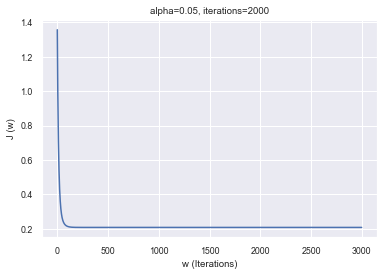

In [505]:
plt.plot(cost)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [501]:
theta

array([[ 0.38352508],
       [ 0.35287685],
       [ 0.11237711],
       [-0.35737314],
       [-0.35008967],
       [ 0.02876576],
       [ 0.02709153],
       [ 0.03451642],
       [-0.00657444],
       [-0.01594202],
       [-0.01183799],
       [ 0.00077534],
       [ 0.05261826],
       [ 0.06436472],
       [ 0.75132595]])

## Regression summary metrics

In [258]:
#Predicting run time
def predict(testData, coeffMatrix):
    predictedTarget = testData.dot(coeffMatrix);
    return predictedTarget;

In [259]:
pred_runtime=predict(x_train,theta)
#runtime['run_diff']=abs(runtime['runtime_pred']-runtime['norm_data_run'])
#runtime.head()

In [260]:
# #RMSE
# (sum(abs(y_train-pred_runtime)**2)/len(norm_y))**0.5
# modelRSquared(y_train,pred_runtime)

In [261]:
#R-square
def modelRSquared(testTarget, predictedTarget):
    targetMean = np.mean(testTarget);
    totalSSE = np.sum((testTarget - targetMean) ** 2);
    residualSSE = np.sum((testTarget - predictedTarget) ** 2);
    rSquared = 1 - (residualSSE / totalSSE);
    return rSquared;

In [262]:
def Adjusted_R(testTarget, predictedTarget,nrow,ncol):
    targetMean = np.mean(testTarget);
    totalSSE = np.sum((testTarget - targetMean) ** 2);
    residualSSE = np.sum((testTarget - predictedTarget) ** 2);
    ad_RSquared = 1 - (((residualSSE) / (totalSSE))*(nrow-1)/(nrow-ncol-1))
    return (ad_RSquared)

In [263]:
# err = np.subtract(y, x@coeff)
#     #Calculating R2 = 1 - sse/sst    
#     sse = np.sum(err**2)
#     sst = np.sum((y - np.mean(y, axis = 0))**2)
#     r2 = 1 - (sse[0]/sst[0])

In [264]:
def MAE(test,pred):
    mean_abs=sum(abs(test-pred))/len(test)
    return (mean_abs)

In [265]:
def RMSE(actual,predicted):
    rm=(sum(abs(actual-predicted)**2)/len(actual))**0.5
    return (rm)

## Function to call all metrics

In [269]:
def regression_results(y_train,pred_runtime):
    rootmeansq=RMSE(y_train,pred_runtime)
    r_squared=modelRSquared(y_train,pred_runtime)
    mean_absolute_error= MAE(y_train,pred_runtime)
    
    print('R-square:',r_squared)#round(r_squared,8))
    print('Root mean square error:',rootmeansq[0])#np.round(rootmeansq,8))
    print('Mean absolute error:',mean_absolute_error[0])#np.round(mean_absolute_error,8))

## Predicting variables from train and test

In [270]:
pred_runtime=predict(x_train,theta)
pred_runtime_out=predict(x_test,theta)

## Comparing In-sample and Out-Sample Statistics

In [271]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_runtime)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_runtime_out)

In-sampling results 

R-square: 0.17793854919799101
Root mean square error: 0.9071052022963343
Mean absolute error: 0.5806632818486622

 Out-sampling results 

R-square: 0.1738455715896
Root mean square error: 0.9079256969238131
Mean absolute error: 0.5804223400327103


## Regression with in-built function to compare

In [97]:
regress=sm.OLS(y_train,x_train).fit()
print(regress.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.408
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              8318.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:09:52   Log-Likelihood:                     -1.9575e+05
No. Observations:              169120   AIC:                                  3.915e+05
Df Residuals:                  169106   BIC:                                  3.917e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\himan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\himan\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\himan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\himan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\himan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# LOGISTIC REGRESSION

In [146]:
runtime2.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625


In [147]:
run_average = np.median(runtime2['runavg'])
print(run_average)
runtime2['Log_run'] =np.where(runtime2['runavg'] >= run_average, 1, 0)
#runtime2 = runtime2.drop(['runavg'], axis = 1)
runtime2.head()

69.79


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg,Log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625,1


In [148]:
a=runtime2.drop(['Log_run','runavg'],axis=1)
a.shape
norm_xl=scaler.fit_transform(a)
b=runtime2.iloc[:,16:17]
b.describe()
norm_yl=np.array(b).reshape([-1,1])

## Splitting the data

In [149]:
#Splitting the datset, into train and test
x_train_log, x_test_log, y_train_log, y_test_log=train_test_split(norm_xl, norm_yl, train_size=0.75,test_size=0.25, random_state=8)

## Logistic regression summary function

In [150]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [151]:
#cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [152]:
#Gradient descent
def gradient_descent(X, y, params, alpha, total):
    m = len(y)
    cost_history = np.zeros((total,1))

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
        print(i,cost_history[i])
    return (cost_history, params)

In [153]:
#Generating a random matrix
theta = np.random.rand(15,1)
theta[1:,]
theta.shape
alpha=0.5
iterations=1000
cost_log=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [1.13850314]
1 [1.05079017]
2 [0.97204687]
3 [0.90215118]
4 [0.84082302]
5 [0.78762337]
6 [0.74196772]
7 [0.70315571]
8 [0.67041423]
9 [0.64294695]
10 [0.61998043]
11 [0.60079945]
12 [0.58476807]
13 [0.57133775]
14 [0.56004593]
15 [0.55050884]
16 [0.54241169]
17 [0.53549821]
18 [0.52956059]
19 [0.52443075]
20 [0.51997267]
21 [0.51607619]
22 [0.51265186]
23 [0.50962676]
24 [0.50694125]
25 [0.50454631]
26 [0.50240143]
27 [0.50047299]
28 [0.4987329]
29 [0.49715757]
30 [0.49572708]
31 [0.49442451]
32 [0.49323542]
33 [0.4921474]
34 [0.49114974]
35 [0.49023317]
36 [0.48938958]
37 [0.48861189]
38 [0.48789386]
39 [0.48723]
40 [0.48661541]
41 [0.48604575]
42 [0.48551717]
43 [0.48502617]
44 [0.48456965]
45 [0.4841448]
46 [0.48374908]
47 [0.4833802]
48 [0.48303608]
49 [0.48271483]
50 [0.48241473]
51 [0.4821342]
52 [0.48187181]
53 [0.48162624]
54 [0.48139629]
55 [0.48118085]
56 [0.48097891]
57 [0.48078952]
58 [0.48061183]
59 [0.48044504]
60 [0.48028841]
61 [0.48014128]
62 [0.48000299]
63 [0.4798

495 [0.47767606]
496 [0.47767606]
497 [0.47767606]
498 [0.47767606]
499 [0.47767606]
500 [0.47767606]
501 [0.47767606]
502 [0.47767606]
503 [0.47767606]
504 [0.47767606]
505 [0.47767606]
506 [0.47767606]
507 [0.47767606]
508 [0.47767606]
509 [0.47767606]
510 [0.47767606]
511 [0.47767606]
512 [0.47767606]
513 [0.47767606]
514 [0.47767606]
515 [0.47767606]
516 [0.47767606]
517 [0.47767606]
518 [0.47767606]
519 [0.47767606]
520 [0.47767606]
521 [0.47767606]
522 [0.47767606]
523 [0.47767606]
524 [0.47767606]
525 [0.47767606]
526 [0.47767606]
527 [0.47767606]
528 [0.47767606]
529 [0.47767606]
530 [0.47767606]
531 [0.47767606]
532 [0.47767606]
533 [0.47767606]
534 [0.47767606]
535 [0.47767606]
536 [0.47767606]
537 [0.47767606]
538 [0.47767606]
539 [0.47767606]
540 [0.47767606]
541 [0.47767606]
542 [0.47767606]
543 [0.47767606]
544 [0.47767606]
545 [0.47767606]
546 [0.47767606]
547 [0.47767606]
548 [0.47767606]
549 [0.47767606]
550 [0.47767606]
551 [0.47767606]
552 [0.47767606]
553 [0.4776760

983 [0.47767606]
984 [0.47767606]
985 [0.47767606]
986 [0.47767606]
987 [0.47767606]
988 [0.47767606]
989 [0.47767606]
990 [0.47767606]
991 [0.47767606]
992 [0.47767606]
993 [0.47767606]
994 [0.47767606]
995 [0.47767606]
996 [0.47767606]
997 [0.47767606]
998 [0.47767606]
999 [0.47767606]


In [154]:
len(cost_log[0])
beta=cost_log[1]
cost=cost_log[0]
cost[iterations-1]

array([0.47767606])

In [155]:
beta

array([[ 1.32030179],
       [ 0.84605064],
       [ 0.15161247],
       [-0.90185887],
       [-0.76434505],
       [-0.05490093],
       [-0.06982137],
       [-0.01585568],
       [-0.08148353],
       [-0.14377474],
       [-0.32187518],
       [-0.02923028],
       [-0.40000505],
       [-0.07913085],
       [ 0.72733412]])

Text(0.5, 1.0, 'alpha=0.5, iterations=1000')

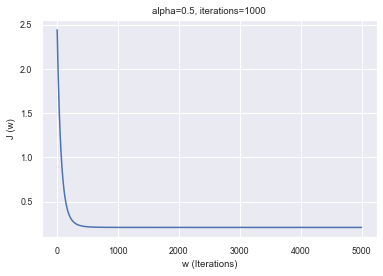

In [447]:
plt.plot(cost)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

## Predict and accuracy functions

In [157]:
def predict_log(X, params):
    return np.round(sigmoid(X @ params))

In [158]:
## Checking accuracy
def accuracy(pred_y,norm_yl):
    count=0
    for i in range(len(pred_y)):
        if (pred_y[i]+norm_yl[i]==2) or (pred_y[i]+norm_yl[i]==0):
            count=count+1
    return(count/len(pred_y))

## Predicting to check in-sample and out-sample accuracy

In [159]:
pred_y_l=predict_log(x_train_log,beta)
pred_y_l_out=predict_log(x_test_log,beta)

In [160]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8095805739514349 

Out-sampling accuracy:  

0.812251655629139


# EXPERIMENT 1
Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) and report on your findings as how the error/accuracy varies for train and test sets with varying these parameters. Plot the results. Report the best values of the parameters

### I used different learning rate (0.01, 0.05, 0.03) with varying iterations (1500, 2000, 3000, 5000) to see convergence point and error

## Linear Regression-1 (0.01, 3000)

In [272]:
#random matrix for coefficients
random.seed(21)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .01
total = 3000
exp = gradesc(x_train,y_train, theta, alpha, total)

0 [2.34902627]
1 [2.31455935]
2 [2.28068058]
3 [2.24737952]
4 [2.21464594]
5 [2.1824698]
6 [2.15084124]
7 [2.11975055]
8 [2.08918823]
9 [2.05914496]
10 [2.02961154]
11 [2.000579]
12 [1.97203847]
13 [1.9439813]
14 [1.91639895]
15 [1.88928306]
16 [1.86262542]
17 [1.83641795]
18 [1.81065274]
19 [1.78532201]
20 [1.76041812]
21 [1.73593357]
22 [1.711861]
23 [1.68819319]
24 [1.66492302]
25 [1.64204353]
26 [1.61954788]
27 [1.59742933]
28 [1.5756813]
29 [1.55429729]
30 [1.53327094]
31 [1.51259601]
32 [1.49226634]
33 [1.47227592]
34 [1.45261883]
35 [1.43328925]
36 [1.41428147]
37 [1.39558989]
38 [1.377209]
39 [1.3591334]
40 [1.34135777]
41 [1.32387691]
42 [1.30668569]
43 [1.28977908]
44 [1.27315214]
45 [1.25680003]
46 [1.24071798]
47 [1.22490131]
48 [1.20934542]
49 [1.19404581]
50 [1.17899804]
51 [1.16419777]
52 [1.1496407]
53 [1.13532265]
54 [1.1212395]
55 [1.10738718]
56 [1.09376173]
57 [1.08035924]
58 [1.06717586]
59 [1.05420784]
60 [1.04145146]
61 [1.0289031]
62 [1.01655917]
63 [1.00441617]

493 [0.21431185]
494 [0.21425546]
495 [0.21419958]
496 [0.21414419]
497 [0.2140893]
498 [0.2140349]
499 [0.21398098]
500 [0.21392753]
501 [0.21387457]
502 [0.21382207]
503 [0.21377003]
504 [0.21371846]
505 [0.21366734]
506 [0.21361668]
507 [0.21356646]
508 [0.21351668]
509 [0.21346734]
510 [0.21341843]
511 [0.21336996]
512 [0.21332191]
513 [0.21327428]
514 [0.21322706]
515 [0.21318026]
516 [0.21313387]
517 [0.21308788]
518 [0.2130423]
519 [0.21299711]
520 [0.21295232]
521 [0.21290791]
522 [0.21286389]
523 [0.21282025]
524 [0.21277699]
525 [0.21273411]
526 [0.2126916]
527 [0.21264945]
528 [0.21260767]
529 [0.21256625]
530 [0.21252518]
531 [0.21248447]
532 [0.21244411]
533 [0.2124041]
534 [0.21236443]
535 [0.2123251]
536 [0.21228611]
537 [0.21224745]
538 [0.21220913]
539 [0.21217113]
540 [0.21213345]
541 [0.2120961]
542 [0.21205907]
543 [0.21202235]
544 [0.21198595]
545 [0.21194985]
546 [0.21191406]
547 [0.21187858]
548 [0.2118434]
549 [0.21180851]
550 [0.21177392]
551 [0.21173963]
552 [

978 [0.20763562]
979 [0.20763439]
980 [0.20763316]
981 [0.20763195]
982 [0.20763074]
983 [0.20762954]
984 [0.20762835]
985 [0.20762717]
986 [0.207626]
987 [0.20762483]
988 [0.20762368]
989 [0.20762253]
990 [0.2076214]
991 [0.20762027]
992 [0.20761915]
993 [0.20761803]
994 [0.20761693]
995 [0.20761583]
996 [0.20761474]
997 [0.20761366]
998 [0.20761259]
999 [0.20761153]
1000 [0.20761047]
1001 [0.20760943]
1002 [0.20760839]
1003 [0.20760735]
1004 [0.20760633]
1005 [0.20760531]
1006 [0.2076043]
1007 [0.2076033]
1008 [0.2076023]
1009 [0.20760132]
1010 [0.20760034]
1011 [0.20759936]
1012 [0.2075984]
1013 [0.20759744]
1014 [0.20759649]
1015 [0.20759554]
1016 [0.20759461]
1017 [0.20759368]
1018 [0.20759275]
1019 [0.20759184]
1020 [0.20759093]
1021 [0.20759002]
1022 [0.20758913]
1023 [0.20758824]
1024 [0.20758735]
1025 [0.20758648]
1026 [0.20758561]
1027 [0.20758474]
1028 [0.20758389]
1029 [0.20758304]
1030 [0.20758219]
1031 [0.20758135]
1032 [0.20758052]
1033 [0.2075797]
1034 [0.20757888]
1035

1437 [0.20747433]
1438 [0.20747428]
1439 [0.20747424]
1440 [0.2074742]
1441 [0.20747416]
1442 [0.20747412]
1443 [0.20747408]
1444 [0.20747404]
1445 [0.20747401]
1446 [0.20747397]
1447 [0.20747393]
1448 [0.20747389]
1449 [0.20747385]
1450 [0.20747381]
1451 [0.20747378]
1452 [0.20747374]
1453 [0.2074737]
1454 [0.20747367]
1455 [0.20747363]
1456 [0.20747359]
1457 [0.20747356]
1458 [0.20747352]
1459 [0.20747349]
1460 [0.20747345]
1461 [0.20747342]
1462 [0.20747338]
1463 [0.20747335]
1464 [0.20747331]
1465 [0.20747328]
1466 [0.20747325]
1467 [0.20747321]
1468 [0.20747318]
1469 [0.20747315]
1470 [0.20747312]
1471 [0.20747308]
1472 [0.20747305]
1473 [0.20747302]
1474 [0.20747299]
1475 [0.20747296]
1476 [0.20747293]
1477 [0.2074729]
1478 [0.20747286]
1479 [0.20747283]
1480 [0.2074728]
1481 [0.20747277]
1482 [0.20747274]
1483 [0.20747272]
1484 [0.20747269]
1485 [0.20747266]
1486 [0.20747263]
1487 [0.2074726]
1488 [0.20747257]
1489 [0.20747254]
1490 [0.20747251]
1491 [0.20747249]
1492 [0.2074724

1896 [0.20746892]
1897 [0.20746892]
1898 [0.20746892]
1899 [0.20746892]
1900 [0.20746892]
1901 [0.20746891]
1902 [0.20746891]
1903 [0.20746891]
1904 [0.20746891]
1905 [0.20746891]
1906 [0.20746891]
1907 [0.20746891]
1908 [0.2074689]
1909 [0.2074689]
1910 [0.2074689]
1911 [0.2074689]
1912 [0.2074689]
1913 [0.2074689]
1914 [0.2074689]
1915 [0.2074689]
1916 [0.20746889]
1917 [0.20746889]
1918 [0.20746889]
1919 [0.20746889]
1920 [0.20746889]
1921 [0.20746889]
1922 [0.20746889]
1923 [0.20746889]
1924 [0.20746889]
1925 [0.20746888]
1926 [0.20746888]
1927 [0.20746888]
1928 [0.20746888]
1929 [0.20746888]
1930 [0.20746888]
1931 [0.20746888]
1932 [0.20746888]
1933 [0.20746888]
1934 [0.20746887]
1935 [0.20746887]
1936 [0.20746887]
1937 [0.20746887]
1938 [0.20746887]
1939 [0.20746887]
1940 [0.20746887]
1941 [0.20746887]
1942 [0.20746887]
1943 [0.20746887]
1944 [0.20746886]
1945 [0.20746886]
1946 [0.20746886]
1947 [0.20746886]
1948 [0.20746886]
1949 [0.20746886]
1950 [0.20746886]
1951 [0.20746886]


2353 [0.20746874]
2354 [0.20746874]
2355 [0.20746874]
2356 [0.20746874]
2357 [0.20746874]
2358 [0.20746874]
2359 [0.20746874]
2360 [0.20746874]
2361 [0.20746874]
2362 [0.20746874]
2363 [0.20746874]
2364 [0.20746874]
2365 [0.20746874]
2366 [0.20746874]
2367 [0.20746874]
2368 [0.20746874]
2369 [0.20746874]
2370 [0.20746874]
2371 [0.20746874]
2372 [0.20746874]
2373 [0.20746874]
2374 [0.20746874]
2375 [0.20746874]
2376 [0.20746874]
2377 [0.20746874]
2378 [0.20746874]
2379 [0.20746874]
2380 [0.20746874]
2381 [0.20746874]
2382 [0.20746874]
2383 [0.20746874]
2384 [0.20746874]
2385 [0.20746874]
2386 [0.20746874]
2387 [0.20746874]
2388 [0.20746874]
2389 [0.20746874]
2390 [0.20746874]
2391 [0.20746874]
2392 [0.20746874]
2393 [0.20746874]
2394 [0.20746874]
2395 [0.20746874]
2396 [0.20746874]
2397 [0.20746874]
2398 [0.20746874]
2399 [0.20746874]
2400 [0.20746874]
2401 [0.20746874]
2402 [0.20746874]
2403 [0.20746874]
2404 [0.20746874]
2405 [0.20746874]
2406 [0.20746874]
2407 [0.20746874]
2408 [0.20

2809 [0.20746873]
2810 [0.20746873]
2811 [0.20746873]
2812 [0.20746873]
2813 [0.20746873]
2814 [0.20746873]
2815 [0.20746873]
2816 [0.20746873]
2817 [0.20746873]
2818 [0.20746873]
2819 [0.20746873]
2820 [0.20746873]
2821 [0.20746873]
2822 [0.20746873]
2823 [0.20746873]
2824 [0.20746873]
2825 [0.20746873]
2826 [0.20746873]
2827 [0.20746873]
2828 [0.20746873]
2829 [0.20746873]
2830 [0.20746873]
2831 [0.20746873]
2832 [0.20746873]
2833 [0.20746873]
2834 [0.20746873]
2835 [0.20746873]
2836 [0.20746873]
2837 [0.20746873]
2838 [0.20746873]
2839 [0.20746873]
2840 [0.20746873]
2841 [0.20746873]
2842 [0.20746873]
2843 [0.20746873]
2844 [0.20746873]
2845 [0.20746873]
2846 [0.20746873]
2847 [0.20746873]
2848 [0.20746873]
2849 [0.20746873]
2850 [0.20746873]
2851 [0.20746873]
2852 [0.20746873]
2853 [0.20746873]
2854 [0.20746873]
2855 [0.20746873]
2856 [0.20746873]
2857 [0.20746873]
2858 [0.20746873]
2859 [0.20746873]
2860 [0.20746873]
2861 [0.20746873]
2862 [0.20746873]
2863 [0.20746873]
2864 [0.20

In [273]:
theta=exp[0]
cost=exp[1]
theta

array([[ 0.38351691],
       [ 0.35287438],
       [ 0.11237239],
       [-0.35736438],
       [-0.35008232],
       [ 0.02876725],
       [ 0.0270888 ],
       [ 0.03451643],
       [-0.00656593],
       [-0.01593951],
       [-0.01183803],
       [ 0.00077534],
       [ 0.05261825],
       [ 0.06436469],
       [ 0.76772885]])

Text(0.5, 1.0, 'alpha=0.01, iterations=3000')

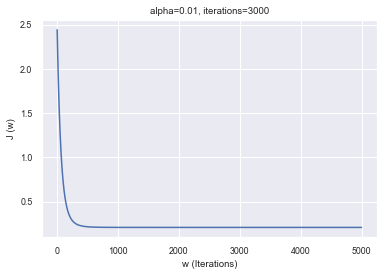

In [450]:
plt.plot(cost)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,total))

In [275]:
pred_in_exp=predict(x_train,theta)
pred_out_exp=predict(x_test,theta)

In [276]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp)

In-sampling results 

R-square: 0.4077929486610341
Root mean square error: 0.7699141530106086
Mean absolute error: 0.4788759648666647

 Out-sampling results 

R-square: 0.40666141353428764
Root mean square error: 0.7694333155480977
Mean absolute error: 0.47821136359023253


In [ ]:
# In-sampling results 

# R-square: 0.40787252473062674
# Root mean square error: 0.7730764341216341
# Mean absolute error: 0.4803775478757182

#  Out-sampling results 

# R-square: 0.4061180563219223
# Root mean square error: 0.7597679812940313
# Mean absolute error: 0.47546493217009217

## Linear Regression-2 (0.01,5000)

In [279]:
#random matrix for coefficients
random.seed(99)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .01
total = 5000
exp = gradesc(x_train,y_train, theta, alpha, total)

0 [2.44120111]
1 [2.40632143]
2 [2.37201833]
3 [2.3382819]
4 [2.30510241]
5 [2.27247031]
6 [2.24037622]
7 [2.20881089]
8 [2.17776529]
9 [2.14723051]
10 [2.1171978]
11 [2.08765857]
12 [2.0586044]
13 [2.03002698]
14 [2.00191817]
15 [1.97426997]
16 [1.94707453]
17 [1.92032412]
18 [1.89401114]
19 [1.86812816]
20 [1.84266785]
21 [1.817623]
22 [1.79298656]
23 [1.76875158]
24 [1.74491123]
25 [1.72145882]
26 [1.69838775]
27 [1.67569156]
28 [1.65336388]
29 [1.63139848]
30 [1.60978921]
31 [1.58853004]
32 [1.56761505]
33 [1.54703842]
34 [1.52679442]
35 [1.50687744]
36 [1.48728195]
37 [1.46800253]
38 [1.44903385]
39 [1.43037066]
40 [1.41200782]
41 [1.39394027]
42 [1.37616305]
43 [1.35867125]
44 [1.3414601]
45 [1.32452487]
46 [1.30786092]
47 [1.29146371]
48 [1.27532876]
49 [1.25945167]
50 [1.24382813]
51 [1.22845388]
52 [1.21332475]
53 [1.19843665]
54 [1.18378554]
55 [1.16936746]
56 [1.15517853]
57 [1.14121492]
58 [1.12747286]
59 [1.11394867]
60 [1.10063873]
61 [1.08753945]
62 [1.07464733]
63 [1.06

492 [0.21518282]
493 [0.21511963]
494 [0.215057]
495 [0.21499494]
496 [0.21493342]
497 [0.21487245]
498 [0.21481203]
499 [0.21475214]
500 [0.21469279]
501 [0.21463396]
502 [0.21457565]
503 [0.21451785]
504 [0.21446057]
505 [0.2144038]
506 [0.21434752]
507 [0.21429174]
508 [0.21423645]
509 [0.21418164]
510 [0.21412732]
511 [0.21407347]
512 [0.2140201]
513 [0.21396719]
514 [0.21391474]
515 [0.21386276]
516 [0.21381122]
517 [0.21376014]
518 [0.2137095]
519 [0.2136593]
520 [0.21360953]
521 [0.2135602]
522 [0.2135113]
523 [0.21346282]
524 [0.21341475]
525 [0.21336711]
526 [0.21331987]
527 [0.21327305]
528 [0.21322662]
529 [0.2131806]
530 [0.21313497]
531 [0.21308974]
532 [0.21304489]
533 [0.21300043]
534 [0.21295635]
535 [0.21291264]
536 [0.21286931]
537 [0.21282635]
538 [0.21278376]
539 [0.21274153]
540 [0.21269966]
541 [0.21265815]
542 [0.21261698]
543 [0.21257617]
544 [0.21253571]
545 [0.21249559]
546 [0.21245581]
547 [0.21241636]
548 [0.21237725]
549 [0.21233847]
550 [0.21230002]
551 [0

978 [0.20766486]
979 [0.20766343]
980 [0.20766201]
981 [0.20766061]
982 [0.20765921]
983 [0.20765783]
984 [0.20765645]
985 [0.20765508]
986 [0.20765373]
987 [0.20765238]
988 [0.20765104]
989 [0.20764972]
990 [0.2076484]
991 [0.20764709]
992 [0.2076458]
993 [0.20764451]
994 [0.20764323]
995 [0.20764196]
996 [0.2076407]
997 [0.20763945]
998 [0.20763821]
999 [0.20763697]
1000 [0.20763575]
1001 [0.20763453]
1002 [0.20763333]
1003 [0.20763213]
1004 [0.20763094]
1005 [0.20762976]
1006 [0.20762859]
1007 [0.20762743]
1008 [0.20762628]
1009 [0.20762513]
1010 [0.20762399]
1011 [0.20762286]
1012 [0.20762174]
1013 [0.20762063]
1014 [0.20761953]
1015 [0.20761843]
1016 [0.20761734]
1017 [0.20761626]
1018 [0.20761519]
1019 [0.20761412]
1020 [0.20761307]
1021 [0.20761202]
1022 [0.20761098]
1023 [0.20760994]
1024 [0.20760892]
1025 [0.2076079]
1026 [0.20760689]
1027 [0.20760588]
1028 [0.20760488]
1029 [0.20760389]
1030 [0.20760291]
1031 [0.20760194]
1032 [0.20760097]
1033 [0.20760001]
1034 [0.20759905]


1438 [0.20747564]
1439 [0.20747559]
1440 [0.20747554]
1441 [0.20747549]
1442 [0.20747544]
1443 [0.20747539]
1444 [0.20747534]
1445 [0.20747529]
1446 [0.20747525]
1447 [0.2074752]
1448 [0.20747515]
1449 [0.20747511]
1450 [0.20747506]
1451 [0.20747501]
1452 [0.20747497]
1453 [0.20747492]
1454 [0.20747488]
1455 [0.20747483]
1456 [0.20747479]
1457 [0.20747475]
1458 [0.2074747]
1459 [0.20747466]
1460 [0.20747462]
1461 [0.20747457]
1462 [0.20747453]
1463 [0.20747449]
1464 [0.20747445]
1465 [0.20747441]
1466 [0.20747437]
1467 [0.20747433]
1468 [0.20747428]
1469 [0.20747424]
1470 [0.2074742]
1471 [0.20747417]
1472 [0.20747413]
1473 [0.20747409]
1474 [0.20747405]
1475 [0.20747401]
1476 [0.20747397]
1477 [0.20747393]
1478 [0.2074739]
1479 [0.20747386]
1480 [0.20747382]
1481 [0.20747378]
1482 [0.20747375]
1483 [0.20747371]
1484 [0.20747368]
1485 [0.20747364]
1486 [0.2074736]
1487 [0.20747357]
1488 [0.20747353]
1489 [0.2074735]
1490 [0.20747347]
1491 [0.20747343]
1492 [0.2074734]
1493 [0.20747336]

1897 [0.20746898]
1898 [0.20746898]
1899 [0.20746897]
1900 [0.20746897]
1901 [0.20746897]
1902 [0.20746897]
1903 [0.20746897]
1904 [0.20746897]
1905 [0.20746896]
1906 [0.20746896]
1907 [0.20746896]
1908 [0.20746896]
1909 [0.20746896]
1910 [0.20746896]
1911 [0.20746895]
1912 [0.20746895]
1913 [0.20746895]
1914 [0.20746895]
1915 [0.20746895]
1916 [0.20746895]
1917 [0.20746895]
1918 [0.20746894]
1919 [0.20746894]
1920 [0.20746894]
1921 [0.20746894]
1922 [0.20746894]
1923 [0.20746894]
1924 [0.20746893]
1925 [0.20746893]
1926 [0.20746893]
1927 [0.20746893]
1928 [0.20746893]
1929 [0.20746893]
1930 [0.20746893]
1931 [0.20746892]
1932 [0.20746892]
1933 [0.20746892]
1934 [0.20746892]
1935 [0.20746892]
1936 [0.20746892]
1937 [0.20746892]
1938 [0.20746891]
1939 [0.20746891]
1940 [0.20746891]
1941 [0.20746891]
1942 [0.20746891]
1943 [0.20746891]
1944 [0.20746891]
1945 [0.20746891]
1946 [0.2074689]
1947 [0.2074689]
1948 [0.2074689]
1949 [0.2074689]
1950 [0.2074689]
1951 [0.2074689]
1952 [0.2074689]

2354 [0.20746874]
2355 [0.20746874]
2356 [0.20746874]
2357 [0.20746874]
2358 [0.20746874]
2359 [0.20746874]
2360 [0.20746874]
2361 [0.20746874]
2362 [0.20746874]
2363 [0.20746874]
2364 [0.20746874]
2365 [0.20746874]
2366 [0.20746874]
2367 [0.20746874]
2368 [0.20746874]
2369 [0.20746874]
2370 [0.20746874]
2371 [0.20746874]
2372 [0.20746874]
2373 [0.20746874]
2374 [0.20746874]
2375 [0.20746874]
2376 [0.20746874]
2377 [0.20746874]
2378 [0.20746874]
2379 [0.20746874]
2380 [0.20746874]
2381 [0.20746874]
2382 [0.20746874]
2383 [0.20746874]
2384 [0.20746874]
2385 [0.20746874]
2386 [0.20746874]
2387 [0.20746874]
2388 [0.20746874]
2389 [0.20746874]
2390 [0.20746874]
2391 [0.20746874]
2392 [0.20746874]
2393 [0.20746874]
2394 [0.20746874]
2395 [0.20746874]
2396 [0.20746874]
2397 [0.20746874]
2398 [0.20746874]
2399 [0.20746874]
2400 [0.20746874]
2401 [0.20746874]
2402 [0.20746874]
2403 [0.20746874]
2404 [0.20746874]
2405 [0.20746874]
2406 [0.20746874]
2407 [0.20746874]
2408 [0.20746874]
2409 [0.20

2810 [0.20746873]
2811 [0.20746873]
2812 [0.20746873]
2813 [0.20746873]
2814 [0.20746873]
2815 [0.20746873]
2816 [0.20746873]
2817 [0.20746873]
2818 [0.20746873]
2819 [0.20746873]
2820 [0.20746873]
2821 [0.20746873]
2822 [0.20746873]
2823 [0.20746873]
2824 [0.20746873]
2825 [0.20746873]
2826 [0.20746873]
2827 [0.20746873]
2828 [0.20746873]
2829 [0.20746873]
2830 [0.20746873]
2831 [0.20746873]
2832 [0.20746873]
2833 [0.20746873]
2834 [0.20746873]
2835 [0.20746873]
2836 [0.20746873]
2837 [0.20746873]
2838 [0.20746873]
2839 [0.20746873]
2840 [0.20746873]
2841 [0.20746873]
2842 [0.20746873]
2843 [0.20746873]
2844 [0.20746873]
2845 [0.20746873]
2846 [0.20746873]
2847 [0.20746873]
2848 [0.20746873]
2849 [0.20746873]
2850 [0.20746873]
2851 [0.20746873]
2852 [0.20746873]
2853 [0.20746873]
2854 [0.20746873]
2855 [0.20746873]
2856 [0.20746873]
2857 [0.20746873]
2858 [0.20746873]
2859 [0.20746873]
2860 [0.20746873]
2861 [0.20746873]
2862 [0.20746873]
2863 [0.20746873]
2864 [0.20746873]
2865 [0.20

3266 [0.20746873]
3267 [0.20746873]
3268 [0.20746873]
3269 [0.20746873]
3270 [0.20746873]
3271 [0.20746873]
3272 [0.20746873]
3273 [0.20746873]
3274 [0.20746873]
3275 [0.20746873]
3276 [0.20746873]
3277 [0.20746873]
3278 [0.20746873]
3279 [0.20746873]
3280 [0.20746873]
3281 [0.20746873]
3282 [0.20746873]
3283 [0.20746873]
3284 [0.20746873]
3285 [0.20746873]
3286 [0.20746873]
3287 [0.20746873]
3288 [0.20746873]
3289 [0.20746873]
3290 [0.20746873]
3291 [0.20746873]
3292 [0.20746873]
3293 [0.20746873]
3294 [0.20746873]
3295 [0.20746873]
3296 [0.20746873]
3297 [0.20746873]
3298 [0.20746873]
3299 [0.20746873]
3300 [0.20746873]
3301 [0.20746873]
3302 [0.20746873]
3303 [0.20746873]
3304 [0.20746873]
3305 [0.20746873]
3306 [0.20746873]
3307 [0.20746873]
3308 [0.20746873]
3309 [0.20746873]
3310 [0.20746873]
3311 [0.20746873]
3312 [0.20746873]
3313 [0.20746873]
3314 [0.20746873]
3315 [0.20746873]
3316 [0.20746873]
3317 [0.20746873]
3318 [0.20746873]
3319 [0.20746873]
3320 [0.20746873]
3321 [0.20

3722 [0.20746873]
3723 [0.20746873]
3724 [0.20746873]
3725 [0.20746873]
3726 [0.20746873]
3727 [0.20746873]
3728 [0.20746873]
3729 [0.20746873]
3730 [0.20746873]
3731 [0.20746873]
3732 [0.20746873]
3733 [0.20746873]
3734 [0.20746873]
3735 [0.20746873]
3736 [0.20746873]
3737 [0.20746873]
3738 [0.20746873]
3739 [0.20746873]
3740 [0.20746873]
3741 [0.20746873]
3742 [0.20746873]
3743 [0.20746873]
3744 [0.20746873]
3745 [0.20746873]
3746 [0.20746873]
3747 [0.20746873]
3748 [0.20746873]
3749 [0.20746873]
3750 [0.20746873]
3751 [0.20746873]
3752 [0.20746873]
3753 [0.20746873]
3754 [0.20746873]
3755 [0.20746873]
3756 [0.20746873]
3757 [0.20746873]
3758 [0.20746873]
3759 [0.20746873]
3760 [0.20746873]
3761 [0.20746873]
3762 [0.20746873]
3763 [0.20746873]
3764 [0.20746873]
3765 [0.20746873]
3766 [0.20746873]
3767 [0.20746873]
3768 [0.20746873]
3769 [0.20746873]
3770 [0.20746873]
3771 [0.20746873]
3772 [0.20746873]
3773 [0.20746873]
3774 [0.20746873]
3775 [0.20746873]
3776 [0.20746873]
3777 [0.20

4178 [0.20746873]
4179 [0.20746873]
4180 [0.20746873]
4181 [0.20746873]
4182 [0.20746873]
4183 [0.20746873]
4184 [0.20746873]
4185 [0.20746873]
4186 [0.20746873]
4187 [0.20746873]
4188 [0.20746873]
4189 [0.20746873]
4190 [0.20746873]
4191 [0.20746873]
4192 [0.20746873]
4193 [0.20746873]
4194 [0.20746873]
4195 [0.20746873]
4196 [0.20746873]
4197 [0.20746873]
4198 [0.20746873]
4199 [0.20746873]
4200 [0.20746873]
4201 [0.20746873]
4202 [0.20746873]
4203 [0.20746873]
4204 [0.20746873]
4205 [0.20746873]
4206 [0.20746873]
4207 [0.20746873]
4208 [0.20746873]
4209 [0.20746873]
4210 [0.20746873]
4211 [0.20746873]
4212 [0.20746873]
4213 [0.20746873]
4214 [0.20746873]
4215 [0.20746873]
4216 [0.20746873]
4217 [0.20746873]
4218 [0.20746873]
4219 [0.20746873]
4220 [0.20746873]
4221 [0.20746873]
4222 [0.20746873]
4223 [0.20746873]
4224 [0.20746873]
4225 [0.20746873]
4226 [0.20746873]
4227 [0.20746873]
4228 [0.20746873]
4229 [0.20746873]
4230 [0.20746873]
4231 [0.20746873]
4232 [0.20746873]
4233 [0.20

4634 [0.20746873]
4635 [0.20746873]
4636 [0.20746873]
4637 [0.20746873]
4638 [0.20746873]
4639 [0.20746873]
4640 [0.20746873]
4641 [0.20746873]
4642 [0.20746873]
4643 [0.20746873]
4644 [0.20746873]
4645 [0.20746873]
4646 [0.20746873]
4647 [0.20746873]
4648 [0.20746873]
4649 [0.20746873]
4650 [0.20746873]
4651 [0.20746873]
4652 [0.20746873]
4653 [0.20746873]
4654 [0.20746873]
4655 [0.20746873]
4656 [0.20746873]
4657 [0.20746873]
4658 [0.20746873]
4659 [0.20746873]
4660 [0.20746873]
4661 [0.20746873]
4662 [0.20746873]
4663 [0.20746873]
4664 [0.20746873]
4665 [0.20746873]
4666 [0.20746873]
4667 [0.20746873]
4668 [0.20746873]
4669 [0.20746873]
4670 [0.20746873]
4671 [0.20746873]
4672 [0.20746873]
4673 [0.20746873]
4674 [0.20746873]
4675 [0.20746873]
4676 [0.20746873]
4677 [0.20746873]
4678 [0.20746873]
4679 [0.20746873]
4680 [0.20746873]
4681 [0.20746873]
4682 [0.20746873]
4683 [0.20746873]
4684 [0.20746873]
4685 [0.20746873]
4686 [0.20746873]
4687 [0.20746873]
4688 [0.20746873]
4689 [0.20

In [285]:
theta=exp[0]
cost=exp[1]
theta

array([[ 0.38352508],
       [ 0.35287684],
       [ 0.11237711],
       [-0.35737314],
       [-0.35008966],
       [ 0.02876576],
       [ 0.02709153],
       [ 0.03451642],
       [-0.00657443],
       [-0.01594201],
       [-0.01183799],
       [ 0.00077534],
       [ 0.05261826],
       [ 0.06436472],
       [ 0.14153941]])

Text(0.5, 1.0, 'alpha=0.01, iterations=5000')

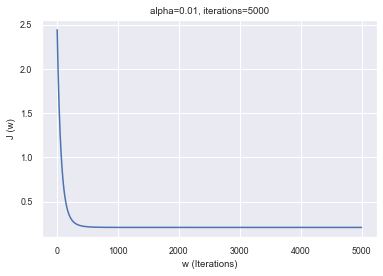

In [451]:
plt.plot(cost)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,total))

In [287]:
pred_in_exp=predict(x_train,theta)
pred_out_exp=predict(x_test,theta)

In [288]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp)

In-sampling results 

R-square: 0.407792948824824
Root mean square error: 0.7699141529041361
Mean absolute error: 0.47887864581895256

 Out-sampling results 

R-square: 0.40666140516908833
Root mean square error: 0.7694333209720349
Mean absolute error: 0.47821403644731364


## Linear Regression-3 (0.01,2000)

In [294]:
#random matrix for coefficients
random.seed(67)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .01
total = 2000
exp_1_3 = gradesc(x_train,y_train, theta, alpha, total)

0 [1.50006238]
1 [1.47924726]
2 [1.45878521]
3 [1.43867002]
4 [1.41889557]
5 [1.39945588]
6 [1.38034507]
7 [1.36155735]
8 [1.34308705]
9 [1.32492861]
10 [1.30707654]
11 [1.28952548]
12 [1.27227016]
13 [1.25530539]
14 [1.23862609]
15 [1.22222725]
16 [1.20610399]
17 [1.19025148]
18 [1.17466499]
19 [1.15933988]
20 [1.14427158]
21 [1.12945562]
22 [1.1148876]
23 [1.10056319]
24 [1.08647817]
25 [1.07262835]
26 [1.05900964]
27 [1.04561804]
28 [1.03244959]
29 [1.01950043]
30 [1.00676673]
31 [0.99424477]
32 [0.98193087]
33 [0.96982143]
34 [0.95791291]
35 [0.94620183]
36 [0.93468478]
37 [0.92335839]
38 [0.91221938]
39 [0.90126451]
40 [0.8904906]
41 [0.87989453]
42 [0.86947324]
43 [0.8592237]
44 [0.84914298]
45 [0.83922815]
46 [0.82947636]
47 [0.81988482]
48 [0.81045077]
49 [0.8011715]
50 [0.79204437]
51 [0.78306675]
52 [0.77423609]
53 [0.76554987]
54 [0.75700562]
55 [0.74860091]
56 [0.74033335]
57 [0.7322006]
58 [0.72420035]
59 [0.71633035]
60 [0.70858837]
61 [0.70097223]
62 [0.69347979]
63 [0.6

493 [0.21068091]
494 [0.21065299]
495 [0.21062533]
496 [0.21059793]
497 [0.2105708]
498 [0.21054392]
499 [0.2105173]
500 [0.21049093]
501 [0.21046482]
502 [0.21043895]
503 [0.21041333]
504 [0.21038795]
505 [0.21036281]
506 [0.2103379]
507 [0.21031324]
508 [0.2102888]
509 [0.21026459]
510 [0.21024062]
511 [0.21021686]
512 [0.21019333]
513 [0.21017002]
514 [0.21014693]
515 [0.21012406]
516 [0.2101014]
517 [0.21007895]
518 [0.2100567]
519 [0.21003467]
520 [0.21001284]
521 [0.20999121]
522 [0.20996979]
523 [0.20994856]
524 [0.20992753]
525 [0.20990669]
526 [0.20988605]
527 [0.2098656]
528 [0.20984533]
529 [0.20982525]
530 [0.20980536]
531 [0.20978565]
532 [0.20976612]
533 [0.20974676]
534 [0.20972759]
535 [0.20970859]
536 [0.20968977]
537 [0.20967111]
538 [0.20965263]
539 [0.20963432]
540 [0.20961617]
541 [0.20959818]
542 [0.20958036]
543 [0.20956271]
544 [0.20954521]
545 [0.20952787]
546 [0.20951069]
547 [0.20949366]
548 [0.20947678]
549 [0.20946006]
550 [0.20944349]
551 [0.20942707]
552 

978 [0.20754069]
979 [0.20754015]
980 [0.20753962]
981 [0.20753909]
982 [0.20753857]
983 [0.20753805]
984 [0.20753753]
985 [0.20753702]
986 [0.20753651]
987 [0.20753601]
988 [0.20753551]
989 [0.20753501]
990 [0.20753452]
991 [0.20753403]
992 [0.20753354]
993 [0.20753306]
994 [0.20753258]
995 [0.20753211]
996 [0.20753163]
997 [0.20753117]
998 [0.2075307]
999 [0.20753024]
1000 [0.20752978]
1001 [0.20752933]
1002 [0.20752888]
1003 [0.20752843]
1004 [0.20752799]
1005 [0.20752755]
1006 [0.20752711]
1007 [0.20752668]
1008 [0.20752625]
1009 [0.20752582]
1010 [0.20752539]
1011 [0.20752497]
1012 [0.20752455]
1013 [0.20752414]
1014 [0.20752373]
1015 [0.20752332]
1016 [0.20752291]
1017 [0.20752251]
1018 [0.20752211]
1019 [0.20752171]
1020 [0.20752132]
1021 [0.20752093]
1022 [0.20752054]
1023 [0.20752016]
1024 [0.20751977]
1025 [0.2075194]
1026 [0.20751902]
1027 [0.20751865]
1028 [0.20751827]
1029 [0.20751791]
1030 [0.20751754]
1031 [0.20751718]
1032 [0.20751682]
1033 [0.20751646]
1034 [0.20751611

1437 [0.20747111]
1438 [0.20747109]
1439 [0.20747107]
1440 [0.20747106]
1441 [0.20747104]
1442 [0.20747102]
1443 [0.20747101]
1444 [0.20747099]
1445 [0.20747097]
1446 [0.20747096]
1447 [0.20747094]
1448 [0.20747092]
1449 [0.20747091]
1450 [0.20747089]
1451 [0.20747087]
1452 [0.20747086]
1453 [0.20747084]
1454 [0.20747083]
1455 [0.20747081]
1456 [0.2074708]
1457 [0.20747078]
1458 [0.20747077]
1459 [0.20747075]
1460 [0.20747074]
1461 [0.20747072]
1462 [0.20747071]
1463 [0.20747069]
1464 [0.20747068]
1465 [0.20747066]
1466 [0.20747065]
1467 [0.20747063]
1468 [0.20747062]
1469 [0.20747061]
1470 [0.20747059]
1471 [0.20747058]
1472 [0.20747057]
1473 [0.20747055]
1474 [0.20747054]
1475 [0.20747053]
1476 [0.20747051]
1477 [0.2074705]
1478 [0.20747049]
1479 [0.20747047]
1480 [0.20747046]
1481 [0.20747045]
1482 [0.20747043]
1483 [0.20747042]
1484 [0.20747041]
1485 [0.2074704]
1486 [0.20747038]
1487 [0.20747037]
1488 [0.20747036]
1489 [0.20747035]
1490 [0.20747034]
1491 [0.20747032]
1492 [0.20747

1895 [0.20746881]
1896 [0.20746881]
1897 [0.20746881]
1898 [0.20746881]
1899 [0.20746881]
1900 [0.20746881]
1901 [0.20746881]
1902 [0.20746881]
1903 [0.20746881]
1904 [0.20746881]
1905 [0.20746881]
1906 [0.2074688]
1907 [0.2074688]
1908 [0.2074688]
1909 [0.2074688]
1910 [0.2074688]
1911 [0.2074688]
1912 [0.2074688]
1913 [0.2074688]
1914 [0.2074688]
1915 [0.2074688]
1916 [0.2074688]
1917 [0.2074688]
1918 [0.2074688]
1919 [0.2074688]
1920 [0.2074688]
1921 [0.2074688]
1922 [0.2074688]
1923 [0.2074688]
1924 [0.2074688]
1925 [0.2074688]
1926 [0.20746879]
1927 [0.20746879]
1928 [0.20746879]
1929 [0.20746879]
1930 [0.20746879]
1931 [0.20746879]
1932 [0.20746879]
1933 [0.20746879]
1934 [0.20746879]
1935 [0.20746879]
1936 [0.20746879]
1937 [0.20746879]
1938 [0.20746879]
1939 [0.20746879]
1940 [0.20746879]
1941 [0.20746879]
1942 [0.20746879]
1943 [0.20746879]
1944 [0.20746879]
1945 [0.20746879]
1946 [0.20746879]
1947 [0.20746879]
1948 [0.20746879]
1949 [0.20746878]
1950 [0.20746878]
1951 [0.2074

In [295]:
theta_1_3=exp_1_3[0]
cost_1_3=exp_1_3[1]

Text(0.5, 1.0, 'alpha=0.01, iterations=2000')

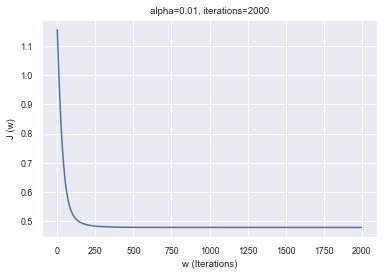

In [452]:
plt.plot(cost_1_3)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,total))

In [297]:
pred_in_exp_1_3=predict(x_train,theta_1_3)
pred_out_exp_1_3=predict(x_test,theta_1_3)

In [298]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp_1_3)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp_1_3)

In-sampling results 

R-square: 0.4077928436775148
Root mean square error: 0.7699142212538709
Mean absolute error: 0.47880538834703734

 Out-sampling results 

R-square: 0.4066619785248048
Root mean square error: 0.7694329492120434
Mean absolute error: 0.478140903518974


## Linear Regression-4 (0.05, 2000)

In [299]:
#random matrix for coefficients
random.seed(21)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .05
total = 2000
exp_1_4 = gradesc(x_train,y_train, theta, alpha, total)

0 [2.93740128]
1 [2.71791103]
2 [2.51674695]
3 [2.33234138]
4 [2.16326301]
5 [2.0082049]
6 [1.8659735]
7 [1.73547872]
8 [1.61572482]
9 [1.50580216]
10 [1.40487961]
11 [1.31219773]
12 [1.22706247]
13 [1.14883944]
14 [1.07694874]
15 [1.01086019]
16 [0.95008902]
17 [0.89419186]
18 [0.84276323]
19 [0.79543219]
20 [0.75185934]
21 [0.71173416]
22 [0.67477242]
23 [0.64071399]
24 [0.60932069]
25 [0.58037446]
26 [0.5536756]
27 [0.5290412]
28 [0.50630367]
29 [0.4853095]
30 [0.46591796]
31 [0.4480001]
32 [0.43143767]
33 [0.41612227]
34 [0.40195446]
35 [0.38884304]
36 [0.37670433]
37 [0.36546153]
38 [0.35504417]
39 [0.34538753]
40 [0.3364322]
41 [0.3281236]
42 [0.32041159]
43 [0.3132501]
44 [0.30659679]
45 [0.30041274]
46 [0.29466214]
47 [0.28931207]
48 [0.28433224]
49 [0.27969479]
50 [0.27537404]
51 [0.27134637]
52 [0.26759003]
53 [0.26408497]
54 [0.26081271]
55 [0.25775624]
56 [0.25489984]
57 [0.25222905]
58 [0.24973049]
59 [0.24739185]
60 [0.24520173]
61 [0.24314963]
62 [0.24122584]
63 [0.23942

492 [0.20746873]
493 [0.20746873]
494 [0.20746873]
495 [0.20746873]
496 [0.20746873]
497 [0.20746873]
498 [0.20746873]
499 [0.20746873]
500 [0.20746873]
501 [0.20746873]
502 [0.20746873]
503 [0.20746873]
504 [0.20746873]
505 [0.20746873]
506 [0.20746873]
507 [0.20746873]
508 [0.20746873]
509 [0.20746873]
510 [0.20746873]
511 [0.20746873]
512 [0.20746873]
513 [0.20746873]
514 [0.20746873]
515 [0.20746873]
516 [0.20746873]
517 [0.20746873]
518 [0.20746873]
519 [0.20746873]
520 [0.20746873]
521 [0.20746873]
522 [0.20746873]
523 [0.20746873]
524 [0.20746873]
525 [0.20746873]
526 [0.20746873]
527 [0.20746873]
528 [0.20746873]
529 [0.20746873]
530 [0.20746873]
531 [0.20746873]
532 [0.20746873]
533 [0.20746873]
534 [0.20746873]
535 [0.20746873]
536 [0.20746873]
537 [0.20746873]
538 [0.20746873]
539 [0.20746873]
540 [0.20746873]
541 [0.20746873]
542 [0.20746873]
543 [0.20746873]
544 [0.20746873]
545 [0.20746873]
546 [0.20746873]
547 [0.20746873]
548 [0.20746873]
549 [0.20746873]
550 [0.2074687

974 [0.20746873]
975 [0.20746873]
976 [0.20746873]
977 [0.20746873]
978 [0.20746873]
979 [0.20746873]
980 [0.20746873]
981 [0.20746873]
982 [0.20746873]
983 [0.20746873]
984 [0.20746873]
985 [0.20746873]
986 [0.20746873]
987 [0.20746873]
988 [0.20746873]
989 [0.20746873]
990 [0.20746873]
991 [0.20746873]
992 [0.20746873]
993 [0.20746873]
994 [0.20746873]
995 [0.20746873]
996 [0.20746873]
997 [0.20746873]
998 [0.20746873]
999 [0.20746873]
1000 [0.20746873]
1001 [0.20746873]
1002 [0.20746873]
1003 [0.20746873]
1004 [0.20746873]
1005 [0.20746873]
1006 [0.20746873]
1007 [0.20746873]
1008 [0.20746873]
1009 [0.20746873]
1010 [0.20746873]
1011 [0.20746873]
1012 [0.20746873]
1013 [0.20746873]
1014 [0.20746873]
1015 [0.20746873]
1016 [0.20746873]
1017 [0.20746873]
1018 [0.20746873]
1019 [0.20746873]
1020 [0.20746873]
1021 [0.20746873]
1022 [0.20746873]
1023 [0.20746873]
1024 [0.20746873]
1025 [0.20746873]
1026 [0.20746873]
1027 [0.20746873]
1028 [0.20746873]
1029 [0.20746873]
1030 [0.20746873]


1431 [0.20746873]
1432 [0.20746873]
1433 [0.20746873]
1434 [0.20746873]
1435 [0.20746873]
1436 [0.20746873]
1437 [0.20746873]
1438 [0.20746873]
1439 [0.20746873]
1440 [0.20746873]
1441 [0.20746873]
1442 [0.20746873]
1443 [0.20746873]
1444 [0.20746873]
1445 [0.20746873]
1446 [0.20746873]
1447 [0.20746873]
1448 [0.20746873]
1449 [0.20746873]
1450 [0.20746873]
1451 [0.20746873]
1452 [0.20746873]
1453 [0.20746873]
1454 [0.20746873]
1455 [0.20746873]
1456 [0.20746873]
1457 [0.20746873]
1458 [0.20746873]
1459 [0.20746873]
1460 [0.20746873]
1461 [0.20746873]
1462 [0.20746873]
1463 [0.20746873]
1464 [0.20746873]
1465 [0.20746873]
1466 [0.20746873]
1467 [0.20746873]
1468 [0.20746873]
1469 [0.20746873]
1470 [0.20746873]
1471 [0.20746873]
1472 [0.20746873]
1473 [0.20746873]
1474 [0.20746873]
1475 [0.20746873]
1476 [0.20746873]
1477 [0.20746873]
1478 [0.20746873]
1479 [0.20746873]
1480 [0.20746873]
1481 [0.20746873]
1482 [0.20746873]
1483 [0.20746873]
1484 [0.20746873]
1485 [0.20746873]
1486 [0.20

1887 [0.20746873]
1888 [0.20746873]
1889 [0.20746873]
1890 [0.20746873]
1891 [0.20746873]
1892 [0.20746873]
1893 [0.20746873]
1894 [0.20746873]
1895 [0.20746873]
1896 [0.20746873]
1897 [0.20746873]
1898 [0.20746873]
1899 [0.20746873]
1900 [0.20746873]
1901 [0.20746873]
1902 [0.20746873]
1903 [0.20746873]
1904 [0.20746873]
1905 [0.20746873]
1906 [0.20746873]
1907 [0.20746873]
1908 [0.20746873]
1909 [0.20746873]
1910 [0.20746873]
1911 [0.20746873]
1912 [0.20746873]
1913 [0.20746873]
1914 [0.20746873]
1915 [0.20746873]
1916 [0.20746873]
1917 [0.20746873]
1918 [0.20746873]
1919 [0.20746873]
1920 [0.20746873]
1921 [0.20746873]
1922 [0.20746873]
1923 [0.20746873]
1924 [0.20746873]
1925 [0.20746873]
1926 [0.20746873]
1927 [0.20746873]
1928 [0.20746873]
1929 [0.20746873]
1930 [0.20746873]
1931 [0.20746873]
1932 [0.20746873]
1933 [0.20746873]
1934 [0.20746873]
1935 [0.20746873]
1936 [0.20746873]
1937 [0.20746873]
1938 [0.20746873]
1939 [0.20746873]
1940 [0.20746873]
1941 [0.20746873]
1942 [0.20

In [300]:
theta_1_4=exp_1_4[0]
cost_1_4=exp_1_4[1]

Text(0.5, 1.0, 'alpha=0.05, iterations=2000')

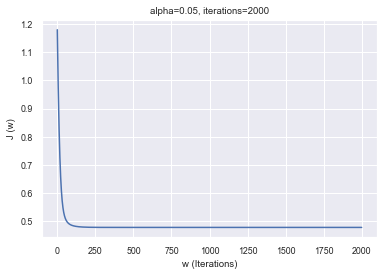

In [453]:

plt.plot(cost_1_4)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,total))

In [302]:
pred_in_exp_1_4=predict(x_train,theta_1_4)
pred_out_exp_1_4=predict(x_test,theta_1_4)

In [303]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp_1_4)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp_1_4)

In-sampling results 

R-square: 0.407792948824824
Root mean square error: 0.7699141529041312
Mean absolute error: 0.47887864750493425

 Out-sampling results 

R-square: 0.40666140524442684
Root mean square error: 0.7694333209231881
Mean absolute error: 0.4782140381285783


## Linear Regression-5 (0.05, 1500) ---------------> BEST LINEAR MODEL

In [304]:
#random matrix for coefficients
random.seed(21)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .05
total = 1500
exp_1_5 = gradesc(x_train,y_train, theta, alpha, total)

0 [1.42984719]
1 [1.34498321]
2 [1.26658634]
3 [1.1941336]
4 [1.12714589]
5 [1.06518425]
6 [1.00784636]
7 [0.95476345]
8 [0.90559742]
9 [0.8600382]
10 [0.81780137]
11 [0.77862599]
12 [0.7422726]
13 [0.70852137]
14 [0.67717049]
15 [0.6480346]
16 [0.62094343]
17 [0.59574052]
18 [0.57228207]
19 [0.55043587]
20 [0.53008033]
21 [0.51110361]
22 [0.49340279]
23 [0.47688313]
24 [0.46145741]
25 [0.44704529]
26 [0.43357276]
27 [0.4209716]
28 [0.40917891]
29 [0.39813671]
30 [0.38779147]
31 [0.37809382]
32 [0.36899815]
33 [0.36046237]
34 [0.35244756]
35 [0.34491777]
36 [0.33783975]
37 [0.33118274]
38 [0.32491829]
39 [0.31902005]
40 [0.31346363]
41 [0.30822641]
42 [0.30328744]
43 [0.2986273]
44 [0.29422795]
45 [0.29007267]
46 [0.28614593]
47 [0.28243328]
48 [0.27892133]
49 [0.27559759]
50 [0.27245047]
51 [0.26946918]
52 [0.26664364]
53 [0.26396451]
54 [0.26142304]
55 [0.2590111]
56 [0.2567211]
57 [0.25454593]
58 [0.25247899]
59 [0.25051407]
60 [0.24864541]
61 [0.24686758]
62 [0.24517552]
63 [0.2435

492 [0.20746874]
493 [0.20746873]
494 [0.20746873]
495 [0.20746873]
496 [0.20746873]
497 [0.20746873]
498 [0.20746873]
499 [0.20746873]
500 [0.20746873]
501 [0.20746873]
502 [0.20746873]
503 [0.20746873]
504 [0.20746873]
505 [0.20746873]
506 [0.20746873]
507 [0.20746873]
508 [0.20746873]
509 [0.20746873]
510 [0.20746873]
511 [0.20746873]
512 [0.20746873]
513 [0.20746873]
514 [0.20746873]
515 [0.20746873]
516 [0.20746873]
517 [0.20746873]
518 [0.20746873]
519 [0.20746873]
520 [0.20746873]
521 [0.20746873]
522 [0.20746873]
523 [0.20746873]
524 [0.20746873]
525 [0.20746873]
526 [0.20746873]
527 [0.20746873]
528 [0.20746873]
529 [0.20746873]
530 [0.20746873]
531 [0.20746873]
532 [0.20746873]
533 [0.20746873]
534 [0.20746873]
535 [0.20746873]
536 [0.20746873]
537 [0.20746873]
538 [0.20746873]
539 [0.20746873]
540 [0.20746873]
541 [0.20746873]
542 [0.20746873]
543 [0.20746873]
544 [0.20746873]
545 [0.20746873]
546 [0.20746873]
547 [0.20746873]
548 [0.20746873]
549 [0.20746873]
550 [0.2074687

974 [0.20746873]
975 [0.20746873]
976 [0.20746873]
977 [0.20746873]
978 [0.20746873]
979 [0.20746873]
980 [0.20746873]
981 [0.20746873]
982 [0.20746873]
983 [0.20746873]
984 [0.20746873]
985 [0.20746873]
986 [0.20746873]
987 [0.20746873]
988 [0.20746873]
989 [0.20746873]
990 [0.20746873]
991 [0.20746873]
992 [0.20746873]
993 [0.20746873]
994 [0.20746873]
995 [0.20746873]
996 [0.20746873]
997 [0.20746873]
998 [0.20746873]
999 [0.20746873]
1000 [0.20746873]
1001 [0.20746873]
1002 [0.20746873]
1003 [0.20746873]
1004 [0.20746873]
1005 [0.20746873]
1006 [0.20746873]
1007 [0.20746873]
1008 [0.20746873]
1009 [0.20746873]
1010 [0.20746873]
1011 [0.20746873]
1012 [0.20746873]
1013 [0.20746873]
1014 [0.20746873]
1015 [0.20746873]
1016 [0.20746873]
1017 [0.20746873]
1018 [0.20746873]
1019 [0.20746873]
1020 [0.20746873]
1021 [0.20746873]
1022 [0.20746873]
1023 [0.20746873]
1024 [0.20746873]
1025 [0.20746873]
1026 [0.20746873]
1027 [0.20746873]
1028 [0.20746873]
1029 [0.20746873]
1030 [0.20746873]


1431 [0.20746873]
1432 [0.20746873]
1433 [0.20746873]
1434 [0.20746873]
1435 [0.20746873]
1436 [0.20746873]
1437 [0.20746873]
1438 [0.20746873]
1439 [0.20746873]
1440 [0.20746873]
1441 [0.20746873]
1442 [0.20746873]
1443 [0.20746873]
1444 [0.20746873]
1445 [0.20746873]
1446 [0.20746873]
1447 [0.20746873]
1448 [0.20746873]
1449 [0.20746873]
1450 [0.20746873]
1451 [0.20746873]
1452 [0.20746873]
1453 [0.20746873]
1454 [0.20746873]
1455 [0.20746873]
1456 [0.20746873]
1457 [0.20746873]
1458 [0.20746873]
1459 [0.20746873]
1460 [0.20746873]
1461 [0.20746873]
1462 [0.20746873]
1463 [0.20746873]
1464 [0.20746873]
1465 [0.20746873]
1466 [0.20746873]
1467 [0.20746873]
1468 [0.20746873]
1469 [0.20746873]
1470 [0.20746873]
1471 [0.20746873]
1472 [0.20746873]
1473 [0.20746873]
1474 [0.20746873]
1475 [0.20746873]
1476 [0.20746873]
1477 [0.20746873]
1478 [0.20746873]
1479 [0.20746873]
1480 [0.20746873]
1481 [0.20746873]
1482 [0.20746873]
1483 [0.20746873]
1484 [0.20746873]
1485 [0.20746873]
1486 [0.20

In [305]:
theta_1_5=exp_1_5[0]
cost_1_5=exp_1_5[1]

Text(0.5, 1.0, 'Best all features model\nalpha=0.05, iterations=2000')

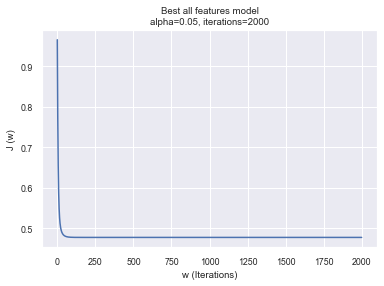

In [479]:
alpha = .05
total = 1500
plt.plot(cost_1_5)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Best all features model\nalpha={}, iterations={}'.format(alpha,iterations))

In [307]:
pred_in_exp_1_5=predict(x_train,theta_1_5)
pred_out_exp_1_5=predict(x_test,theta_1_5)

In [308]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp_1_5)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp_1_5)

In-sampling results 

R-square: 0.407792948824824
Root mean square error: 0.7699141529041359
Mean absolute error: 0.4788786475047883

 Out-sampling results 

R-square: 0.4066614052444252
Root mean square error: 0.7694333209231878
Mean absolute error: 0.47821403812842905


In [394]:
Adjusted_R(y_train,pred_in_exp_1_5,169120,15)

0.4077404183952208

## Linear Regression-6 (0.03, 1000)

In [309]:
#random matrix for coefficients
random.seed(21)
theta = np.random.rand(15,1)
theta[1:,]
theta.shape[0]
alpha = .03
total = 1000
exp_1_6 = gradesc(x_train,y_train, theta, alpha, total)

0 [2.22543554]
1 [2.13042512]
2 [2.04024784]
3 [1.95464622]
4 [1.87337687]
5 [1.79620977]
6 [1.72292744]
7 [1.65332431]
8 [1.58720601]
9 [1.52438876]
10 [1.46469881]
11 [1.40797183]
12 [1.35405241]
13 [1.30279361]
14 [1.2540564]
15 [1.2077093]
16 [1.16362793]
17 [1.12169462]
18 [1.08179804]
19 [1.04383285]
20 [1.00769936]
21 [0.97330326]
22 [0.94055526]
23 [0.90937087]
24 [0.8796701]
25 [0.85137725]
26 [0.82442061]
27 [0.79873233]
28 [0.77424813]
29 [0.75090716]
30 [0.72865177]
31 [0.70742737]
32 [0.68718226]
33 [0.66786743]
34 [0.64943649]
35 [0.63184543]
36 [0.6150526]
37 [0.59901849]
38 [0.58370568]
39 [0.56907867]
40 [0.55510383]
41 [0.54174926]
42 [0.52898472]
43 [0.51678154]
44 [0.50511251]
45 [0.49395184]
46 [0.48327505]
47 [0.47305892]
48 [0.46328142]
49 [0.45392165]
50 [0.44495975]
51 [0.4363769]
52 [0.42815522]
53 [0.42027773]
54 [0.41272831]
55 [0.40549166]
56 [0.39855323]
57 [0.39189921]
58 [0.3855165]
59 [0.3793926]
60 [0.37351569]
61 [0.3678745]
62 [0.36245832]
63 [0.3572

492 [0.20747587]
493 [0.20747572]
494 [0.20747557]
495 [0.20747542]
496 [0.20747528]
497 [0.20747514]
498 [0.207475]
499 [0.20747486]
500 [0.20747473]
501 [0.2074746]
502 [0.20747448]
503 [0.20747435]
504 [0.20747423]
505 [0.20747411]
506 [0.207474]
507 [0.20747388]
508 [0.20747377]
509 [0.20747366]
510 [0.20747356]
511 [0.20747345]
512 [0.20747335]
513 [0.20747325]
514 [0.20747316]
515 [0.20747306]
516 [0.20747297]
517 [0.20747288]
518 [0.20747279]
519 [0.2074727]
520 [0.20747261]
521 [0.20747253]
522 [0.20747245]
523 [0.20747237]
524 [0.20747229]
525 [0.20747221]
526 [0.20747214]
527 [0.20747207]
528 [0.20747199]
529 [0.20747192]
530 [0.20747186]
531 [0.20747179]
532 [0.20747172]
533 [0.20747166]
534 [0.20747159]
535 [0.20747153]
536 [0.20747147]
537 [0.20747141]
538 [0.20747136]
539 [0.2074713]
540 [0.20747124]
541 [0.20747119]
542 [0.20747114]
543 [0.20747109]
544 [0.20747104]
545 [0.20747099]
546 [0.20747094]
547 [0.20747089]
548 [0.20747084]
549 [0.2074708]
550 [0.20747075]
551 [

976 [0.20746873]
977 [0.20746873]
978 [0.20746873]
979 [0.20746873]
980 [0.20746873]
981 [0.20746873]
982 [0.20746873]
983 [0.20746873]
984 [0.20746873]
985 [0.20746873]
986 [0.20746873]
987 [0.20746873]
988 [0.20746873]
989 [0.20746873]
990 [0.20746873]
991 [0.20746873]
992 [0.20746873]
993 [0.20746873]
994 [0.20746873]
995 [0.20746873]
996 [0.20746873]
997 [0.20746873]
998 [0.20746873]
999 [0.20746873]


In [310]:
theta_1_6=exp_1_6[0]
cost_1_6=exp_1_6[1]

Text(0.5, 1.0, 'alpha=0.03, iterations=1000')

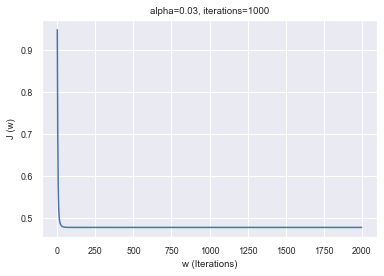

In [465]:

plt.plot(cost_1_6)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,total))

In [312]:
pred_in_exp_1_6=predict(x_train,theta_1_6)
pred_out_exp_1_6=predict(x_test,theta_1_6)

In [313]:
print('In-sampling results','\n')
in_result=regression_results(y_train,pred_in_exp_1_6)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test,pred_out_exp_1_6)

In-sampling results 

R-square: 0.4077929484941424
Root mean square error: 0.7699141531190856
Mean absolute error: 0.4788758367915544

 Out-sampling results 

R-square: 0.4066612802188927
Root mean square error: 0.7694334019888764
Mean absolute error: 0.4782112382708997


## Logistic Regression-1 (0.05, 1000)

In [314]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.05
iterations=1000
cost_log_1_1=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [1.17152354]
1 [1.16157134]
2 [1.15172022]
3 [1.14197026]
4 [1.13232154]
5 [1.1227741]
6 [1.11332799]
7 [1.1039832]
8 [1.09473973]
9 [1.08559756]
10 [1.07655662]
11 [1.06761685]
12 [1.05877815]
13 [1.05004041]
14 [1.0414035]
15 [1.03286726]
16 [1.02443151]
17 [1.01609606]
18 [1.0078607]
19 [0.99972517]
20 [0.99168923]
21 [0.98375259]
22 [0.97591496]
23 [0.968176]
24 [0.96053539]
25 [0.95299276]
26 [0.94554773]
27 [0.9381999]
28 [0.93094885]
29 [0.92379414]
30 [0.9167353]
31 [0.90977187]
32 [0.90290335]
33 [0.89612921]
34 [0.88944893]
35 [0.88286196]
36 [0.87636772]
37 [0.86996563]
38 [0.86365509]
39 [0.85743549]
40 [0.85130617]
41 [0.8452665]
42 [0.8393158]
43 [0.8334534]
44 [0.8276786]
45 [0.82199069]
46 [0.81638894]
47 [0.81087263]
48 [0.80544099]
49 [0.80009327]
50 [0.7948287]
51 [0.78964649]
52 [0.78454584]
53 [0.77952596]
54 [0.77458602]
55 [0.7697252]
56 [0.76494267]
57 [0.7602376]
58 [0.75560912]
59 [0.75105639]
60 [0.74657854]
61 [0.74217471]
62 [0.73784402]
63 [0.7335856]
64

494 [0.48220349]
495 [0.48217646]
496 [0.4821496]
497 [0.48212293]
498 [0.48209643]
499 [0.48207011]
500 [0.48204396]
501 [0.48201798]
502 [0.48199217]
503 [0.48196653]
504 [0.48194106]
505 [0.48191576]
506 [0.48189062]
507 [0.48186565]
508 [0.48184084]
509 [0.48181619]
510 [0.4817917]
511 [0.48176737]
512 [0.4817432]
513 [0.48171919]
514 [0.48169533]
515 [0.48167163]
516 [0.48164808]
517 [0.48162469]
518 [0.48160144]
519 [0.48157835]
520 [0.4815554]
521 [0.48153261]
522 [0.48150995]
523 [0.48148745]
524 [0.48146509]
525 [0.48144287]
526 [0.4814208]
527 [0.48139887]
528 [0.48137708]
529 [0.48135542]
530 [0.48133391]
531 [0.48131254]
532 [0.4812913]
533 [0.48127019]
534 [0.48124922]
535 [0.48122839]
536 [0.48120768]
537 [0.48118711]
538 [0.48116667]
539 [0.48114636]
540 [0.48112618]
541 [0.48110612]
542 [0.4810862]
543 [0.4810664]
544 [0.48104672]
545 [0.48102717]
546 [0.48100774]
547 [0.48098843]
548 [0.48096925]
549 [0.48095019]
550 [0.48093124]
551 [0.48091242]
552 [0.48089371]
553 [

983 [0.47798823]
984 [0.47798662]
985 [0.47798502]
986 [0.47798342]
987 [0.47798184]
988 [0.47798026]
989 [0.47797869]
990 [0.47797713]
991 [0.47797558]
992 [0.47797404]
993 [0.4779725]
994 [0.47797097]
995 [0.47796946]
996 [0.47796794]
997 [0.47796644]
998 [0.47796494]
999 [0.47796346]


In [315]:
beta_1_1=cost_log_1_1[1]
cost_1_1=cost_log_1_1[0]

Text(0.5, 1.0, 'alpha=0.05, iterations=1000')

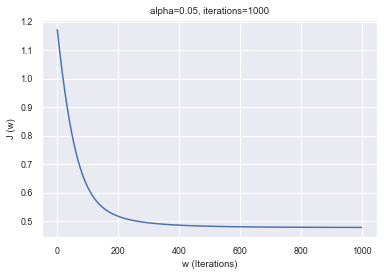

In [464]:
plt.plot(cost_1_1)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [317]:
pred_y_l_1_1=predict_log(x_train_log,beta_1_1)
pred_y_l_out_1_1=predict_log(x_test_log,beta_1_1)

In [318]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_1,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_1,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8092770419426049 

Out-sampling accuracy:  

0.8123344370860928


## Logistic Regression-2 (0.05,2000)

In [319]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.05
iterations=2000
cost_log_1_2=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [0.95519299]
1 [0.94759624]
2 [0.94009555]
3 [0.93269064]
4 [0.92538121]
5 [0.91816693]
6 [0.91104746]
7 [0.90402243]
8 [0.89709145]
9 [0.89025412]
10 [0.88351]
11 [0.87685865]
12 [0.8702996]
13 [0.86383235]
14 [0.8574564]
15 [0.85117122]
16 [0.84497626]
17 [0.83887097]
18 [0.83285474]
19 [0.82692699]
20 [0.82108708]
21 [0.8153344]
22 [0.80966827]
23 [0.80408804]
24 [0.79859301]
25 [0.79318249]
26 [0.78785576]
27 [0.78261209]
28 [0.77745073]
29 [0.77237094]
30 [0.76737195]
31 [0.76245296]
32 [0.7576132]
33 [0.75285185]
34 [0.74816811]
35 [0.74356115]
36 [0.73903015]
37 [0.73457425]
38 [0.73019262]
39 [0.7258844]
40 [0.72164874]
41 [0.71748475]
42 [0.71339158]
43 [0.70936834]
44 [0.70541416]
45 [0.70152816]
46 [0.69770944]
47 [0.69395712]
48 [0.69027031]
49 [0.68664812]
50 [0.68308965]
51 [0.67959403]
52 [0.67616035]
53 [0.67278773]
54 [0.66947528]
55 [0.66622212]
56 [0.66302736]
57 [0.65989012]
58 [0.65680954]
59 [0.65378473]
60 [0.65081483]
61 [0.64789898]
62 [0.64503631]
63 [0.6422

492 [0.48082841]
493 [0.48080994]
494 [0.48079158]
495 [0.48077335]
496 [0.48075523]
497 [0.48073723]
498 [0.48071934]
499 [0.48070157]
500 [0.48068391]
501 [0.48066637]
502 [0.48064893]
503 [0.48063161]
504 [0.4806144]
505 [0.4805973]
506 [0.48058031]
507 [0.48056343]
508 [0.48054666]
509 [0.48052999]
510 [0.48051343]
511 [0.48049697]
512 [0.48048062]
513 [0.48046437]
514 [0.48044822]
515 [0.48043218]
516 [0.48041624]
517 [0.48040039]
518 [0.48038465]
519 [0.48036901]
520 [0.48035347]
521 [0.48033802]
522 [0.48032267]
523 [0.48030742]
524 [0.48029226]
525 [0.4802772]
526 [0.48026223]
527 [0.48024736]
528 [0.48023258]
529 [0.48021789]
530 [0.48020329]
531 [0.48018879]
532 [0.48017437]
533 [0.48016005]
534 [0.48014581]
535 [0.48013166]
536 [0.4801176]
537 [0.48010363]
538 [0.48008975]
539 [0.48007595]
540 [0.48006223]
541 [0.4800486]
542 [0.48003506]
543 [0.4800216]
544 [0.48000822]
545 [0.47999492]
546 [0.47998171]
547 [0.47996858]
548 [0.47995553]
549 [0.47994256]
550 [0.47992966]
551

977 [0.47790437]
978 [0.4779032]
979 [0.47790203]
980 [0.47790087]
981 [0.47789972]
982 [0.47789857]
983 [0.47789743]
984 [0.47789629]
985 [0.47789516]
986 [0.47789404]
987 [0.47789292]
988 [0.47789181]
989 [0.4778907]
990 [0.4778896]
991 [0.47788851]
992 [0.47788742]
993 [0.47788634]
994 [0.47788526]
995 [0.47788419]
996 [0.47788312]
997 [0.47788206]
998 [0.477881]
999 [0.47787996]
1000 [0.47787891]
1001 [0.47787787]
1002 [0.47787684]
1003 [0.47787581]
1004 [0.47787479]
1005 [0.47787377]
1006 [0.47787276]
1007 [0.47787176]
1008 [0.47787075]
1009 [0.47786976]
1010 [0.47786877]
1011 [0.47786778]
1012 [0.4778668]
1013 [0.47786583]
1014 [0.47786486]
1015 [0.47786389]
1016 [0.47786293]
1017 [0.47786198]
1018 [0.47786103]
1019 [0.47786008]
1020 [0.47785914]
1021 [0.47785821]
1022 [0.47785728]
1023 [0.47785635]
1024 [0.47785543]
1025 [0.47785452]
1026 [0.4778536]
1027 [0.4778527]
1028 [0.4778518]
1029 [0.4778509]
1030 [0.47785001]
1031 [0.47784912]
1032 [0.47784824]
1033 [0.47784736]
1034 [0

1436 [0.47769869]
1437 [0.47769858]
1438 [0.47769846]
1439 [0.47769835]
1440 [0.47769824]
1441 [0.47769813]
1442 [0.47769802]
1443 [0.47769792]
1444 [0.47769781]
1445 [0.4776977]
1446 [0.47769759]
1447 [0.47769749]
1448 [0.47769738]
1449 [0.47769728]
1450 [0.47769717]
1451 [0.47769707]
1452 [0.47769697]
1453 [0.47769686]
1454 [0.47769676]
1455 [0.47769666]
1456 [0.47769656]
1457 [0.47769645]
1458 [0.47769635]
1459 [0.47769625]
1460 [0.47769615]
1461 [0.47769606]
1462 [0.47769596]
1463 [0.47769586]
1464 [0.47769576]
1465 [0.47769566]
1466 [0.47769557]
1467 [0.47769547]
1468 [0.47769538]
1469 [0.47769528]
1470 [0.47769519]
1471 [0.47769509]
1472 [0.477695]
1473 [0.47769491]
1474 [0.47769481]
1475 [0.47769472]
1476 [0.47769463]
1477 [0.47769454]
1478 [0.47769445]
1479 [0.47769436]
1480 [0.47769427]
1481 [0.47769418]
1482 [0.47769409]
1483 [0.477694]
1484 [0.47769391]
1485 [0.47769382]
1486 [0.47769373]
1487 [0.47769365]
1488 [0.47769356]
1489 [0.47769347]
1490 [0.47769339]
1491 [0.4776933

1899 [0.47767843]
1900 [0.47767842]
1901 [0.47767841]
1902 [0.4776784]
1903 [0.47767839]
1904 [0.47767838]
1905 [0.47767837]
1906 [0.47767836]
1907 [0.47767834]
1908 [0.47767833]
1909 [0.47767832]
1910 [0.47767831]
1911 [0.4776783]
1912 [0.47767829]
1913 [0.47767828]
1914 [0.47767827]
1915 [0.47767826]
1916 [0.47767825]
1917 [0.47767824]
1918 [0.47767823]
1919 [0.47767822]
1920 [0.47767821]
1921 [0.4776782]
1922 [0.47767819]
1923 [0.47767818]
1924 [0.47767817]
1925 [0.47767816]
1926 [0.47767815]
1927 [0.47767814]
1928 [0.47767813]
1929 [0.47767812]
1930 [0.47767811]
1931 [0.4776781]
1932 [0.47767809]
1933 [0.47767808]
1934 [0.47767807]
1935 [0.47767806]
1936 [0.47767805]
1937 [0.47767804]
1938 [0.47767803]
1939 [0.47767802]
1940 [0.47767801]
1941 [0.477678]
1942 [0.47767799]
1943 [0.47767798]
1944 [0.47767798]
1945 [0.47767797]
1946 [0.47767796]
1947 [0.47767795]
1948 [0.47767794]
1949 [0.47767793]
1950 [0.47767792]
1951 [0.47767791]
1952 [0.4776779]
1953 [0.4776779]
1954 [0.47767789]


In [320]:
beta_1_2=cost_log_1_2[1]
cost_1_2=cost_log_1_2[0]

Text(0.5, 1.0, 'alpha=0.05, iterations=2000')

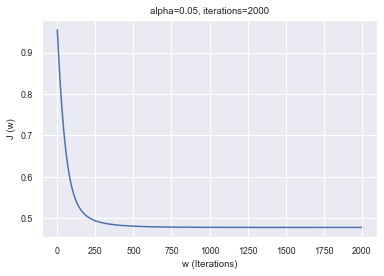

In [463]:

plt.plot(cost_1_2)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [322]:
pred_y_l_1_2=predict_log(x_train_log,beta_1_2)
pred_y_l_out_1_2=predict_log(x_test_log,beta_1_2)

In [323]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_2,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_2,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8096026490066225 

Out-sampling accuracy:  

0.812317880794702


## Logistic Regression-3 (0.1,2000)

In [324]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.1
iterations=2000
cost_log_1_3=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [1.15666096]
1 [1.14018316]
2 [1.12398224]
3 [1.10805844]
4 [1.09241187]
5 [1.07704251]
6 [1.06195022]
7 [1.04713473]
8 [1.03259562]
9 [1.01833235]
10 [1.00434425]
11 [0.99063049]
12 [0.97719013]
13 [0.96402208]
14 [0.95112509]
15 [0.93849781]
16 [0.92613871]
17 [0.91404614]
18 [0.9022183]
19 [0.89065327]
20 [0.87934896]
21 [0.86830316]
22 [0.85751353]
23 [0.84697759]
24 [0.83669273]
25 [0.82665621]
26 [0.81686519]
27 [0.80731667]
28 [0.79800758]
29 [0.7889347]
30 [0.78009475]
31 [0.77148431]
32 [0.76309991]
33 [0.75493795]
34 [0.74699478]
35 [0.73926667]
36 [0.73174983]
37 [0.72444041]
38 [0.7173345]
39 [0.71042815]
40 [0.70371737]
41 [0.69719816]
42 [0.69086646]
43 [0.68471823]
44 [0.6787494]
45 [0.6729559]
46 [0.66733366]
47 [0.66187863]
48 [0.65658678]
49 [0.65145407]
50 [0.64647652]
51 [0.64165016]
52 [0.63697106]
53 [0.63243535]
54 [0.62803917]
55 [0.62377872]
56 [0.61965028]
57 [0.61565014]
58 [0.61177468]
59 [0.60802032]
60 [0.60438356]
61 [0.60086095]
62 [0.59744911]
63 [0.5

495 [0.47798654]
496 [0.47798334]
497 [0.47798017]
498 [0.47797703]
499 [0.47797393]
500 [0.47797086]
501 [0.47796782]
502 [0.47796482]
503 [0.47796184]
504 [0.4779589]
505 [0.47795599]
506 [0.47795311]
507 [0.47795026]
508 [0.47794744]
509 [0.47794465]
510 [0.47794189]
511 [0.47793916]
512 [0.47793646]
513 [0.47793378]
514 [0.47793113]
515 [0.47792852]
516 [0.47792593]
517 [0.47792336]
518 [0.47792082]
519 [0.47791831]
520 [0.47791583]
521 [0.47791337]
522 [0.47791094]
523 [0.47790853]
524 [0.47790615]
525 [0.4779038]
526 [0.47790147]
527 [0.47789916]
528 [0.47789688]
529 [0.47789462]
530 [0.47789238]
531 [0.47789017]
532 [0.47788798]
533 [0.47788582]
534 [0.47788367]
535 [0.47788155]
536 [0.47787945]
537 [0.47787738]
538 [0.47787532]
539 [0.47787329]
540 [0.47787127]
541 [0.47786928]
542 [0.47786731]
543 [0.47786536]
544 [0.47786343]
545 [0.47786152]
546 [0.47785963]
547 [0.47785776]
548 [0.47785591]
549 [0.47785408]
550 [0.47785227]
551 [0.47785047]
552 [0.4778487]
553 [0.47784694]


981 [0.47767854]
982 [0.47767851]
983 [0.47767849]
984 [0.47767847]
985 [0.47767844]
986 [0.47767842]
987 [0.4776784]
988 [0.47767838]
989 [0.47767835]
990 [0.47767833]
991 [0.47767831]
992 [0.47767829]
993 [0.47767827]
994 [0.47767825]
995 [0.47767823]
996 [0.47767821]
997 [0.47767819]
998 [0.47767817]
999 [0.47767815]
1000 [0.47767813]
1001 [0.47767811]
1002 [0.47767809]
1003 [0.47767807]
1004 [0.47767805]
1005 [0.47767803]
1006 [0.47767801]
1007 [0.47767799]
1008 [0.47767797]
1009 [0.47767796]
1010 [0.47767794]
1011 [0.47767792]
1012 [0.4776779]
1013 [0.47767788]
1014 [0.47767787]
1015 [0.47767785]
1016 [0.47767783]
1017 [0.47767782]
1018 [0.4776778]
1019 [0.47767778]
1020 [0.47767777]
1021 [0.47767775]
1022 [0.47767774]
1023 [0.47767772]
1024 [0.4776777]
1025 [0.47767769]
1026 [0.47767767]
1027 [0.47767766]
1028 [0.47767764]
1029 [0.47767763]
1030 [0.47767761]
1031 [0.4776776]
1032 [0.47767758]
1033 [0.47767757]
1034 [0.47767755]
1035 [0.47767754]
1036 [0.47767753]
1037 [0.47767751

1442 [0.4776761]
1443 [0.4776761]
1444 [0.4776761]
1445 [0.4776761]
1446 [0.4776761]
1447 [0.4776761]
1448 [0.4776761]
1449 [0.4776761]
1450 [0.4776761]
1451 [0.4776761]
1452 [0.4776761]
1453 [0.4776761]
1454 [0.4776761]
1455 [0.4776761]
1456 [0.4776761]
1457 [0.4776761]
1458 [0.4776761]
1459 [0.4776761]
1460 [0.47767609]
1461 [0.47767609]
1462 [0.47767609]
1463 [0.47767609]
1464 [0.47767609]
1465 [0.47767609]
1466 [0.47767609]
1467 [0.47767609]
1468 [0.47767609]
1469 [0.47767609]
1470 [0.47767609]
1471 [0.47767609]
1472 [0.47767609]
1473 [0.47767609]
1474 [0.47767609]
1475 [0.47767609]
1476 [0.47767609]
1477 [0.47767609]
1478 [0.47767609]
1479 [0.47767609]
1480 [0.47767609]
1481 [0.47767609]
1482 [0.47767609]
1483 [0.47767609]
1484 [0.47767609]
1485 [0.47767609]
1486 [0.47767609]
1487 [0.47767609]
1488 [0.47767609]
1489 [0.47767609]
1490 [0.47767609]
1491 [0.47767609]
1492 [0.47767609]
1493 [0.47767609]
1494 [0.47767609]
1495 [0.47767609]
1496 [0.47767609]
1497 [0.47767609]
1498 [0.47

1899 [0.47767606]
1900 [0.47767606]
1901 [0.47767606]
1902 [0.47767606]
1903 [0.47767606]
1904 [0.47767606]
1905 [0.47767606]
1906 [0.47767606]
1907 [0.47767606]
1908 [0.47767606]
1909 [0.47767606]
1910 [0.47767606]
1911 [0.47767606]
1912 [0.47767606]
1913 [0.47767606]
1914 [0.47767606]
1915 [0.47767606]
1916 [0.47767606]
1917 [0.47767606]
1918 [0.47767606]
1919 [0.47767606]
1920 [0.47767606]
1921 [0.47767606]
1922 [0.47767606]
1923 [0.47767606]
1924 [0.47767606]
1925 [0.47767606]
1926 [0.47767606]
1927 [0.47767606]
1928 [0.47767606]
1929 [0.47767606]
1930 [0.47767606]
1931 [0.47767606]
1932 [0.47767606]
1933 [0.47767606]
1934 [0.47767606]
1935 [0.47767606]
1936 [0.47767606]
1937 [0.47767606]
1938 [0.47767606]
1939 [0.47767606]
1940 [0.47767606]
1941 [0.47767606]
1942 [0.47767606]
1943 [0.47767606]
1944 [0.47767606]
1945 [0.47767606]
1946 [0.47767606]
1947 [0.47767606]
1948 [0.47767606]
1949 [0.47767606]
1950 [0.47767606]
1951 [0.47767606]
1952 [0.47767606]
1953 [0.47767606]
1954 [0.47

In [325]:
beta_1_3=cost_log_1_3[1]
cost_1_3=cost_log_1_3[0]

Text(0.5, 1.0, 'alpha=0.1, iterations=2000')

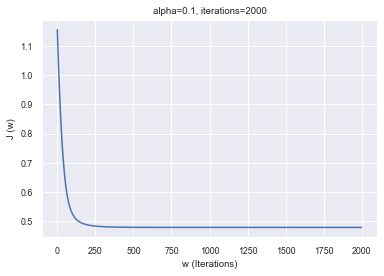

In [462]:

plt.plot(cost_1_3)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [327]:
pred_y_l_1_3=predict_log(x_train_log,beta_1_3)
pred_y_l_out_1_3=predict_log(x_test_log,beta_1_3)

In [328]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_3,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_3,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8095695364238411 

Out-sampling accuracy:  

0.812251655629139


## Logistic Regression-4 (0.2,2000)

In [329]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.2
iterations=2000
cost_log_1_4=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [1.17995789]
1 [1.14287406]
2 [1.10711821]
3 [1.07269801]
4 [1.03961798]
5 [1.00787933]
6 [0.97747978]
7 [0.94841341]
8 [0.92067052]
9 [0.89423758]
10 [0.86909718]
11 [0.84522806]
12 [0.82260525]
13 [0.80120014]
14 [0.78098079]
15 [0.76191215]
16 [0.74395642]
17 [0.72707343]
18 [0.71122106]
19 [0.69635566]
20 [0.68243248]
21 [0.66940615]
22 [0.65723105]
23 [0.6458617]
24 [0.63525316]
25 [0.6253613]
26 [0.61614306]
27 [0.60755674]
28 [0.59956211]
29 [0.59212059]
30 [0.58519533]
31 [0.5787513]
32 [0.57275531]
33 [0.56717603]
34 [0.56198394]
35 [0.55715135]
36 [0.55265232]
37 [0.5484626]
38 [0.54455958]
39 [0.5409222]
40 [0.53753087]
41 [0.53436743]
42 [0.531415]
43 [0.52865796]
44 [0.52608184]
45 [0.52367327]
46 [0.52141986]
47 [0.5193102]
48 [0.51733372]
49 [0.51548067]
50 [0.51374206]
51 [0.51210958]
52 [0.51057557]
53 [0.50913296]
54 [0.50777524]
55 [0.50649637]
56 [0.50529082]
57 [0.50415346]
58 [0.50307955]
59 [0.50206473]
60 [0.50110498]
61 [0.50019656]
62 [0.49933603]
63 [0.4985

494 [0.47767784]
495 [0.4776778]
496 [0.47767777]
497 [0.47767774]
498 [0.47767771]
499 [0.47767768]
500 [0.47767765]
501 [0.47767762]
502 [0.47767759]
503 [0.47767756]
504 [0.47767753]
505 [0.4776775]
506 [0.47767747]
507 [0.47767745]
508 [0.47767742]
509 [0.4776774]
510 [0.47767737]
511 [0.47767735]
512 [0.47767732]
513 [0.4776773]
514 [0.47767728]
515 [0.47767725]
516 [0.47767723]
517 [0.47767721]
518 [0.47767719]
519 [0.47767717]
520 [0.47767715]
521 [0.47767713]
522 [0.47767711]
523 [0.47767709]
524 [0.47767707]
525 [0.47767705]
526 [0.47767703]
527 [0.47767701]
528 [0.47767699]
529 [0.47767698]
530 [0.47767696]
531 [0.47767694]
532 [0.47767693]
533 [0.47767691]
534 [0.47767689]
535 [0.47767688]
536 [0.47767686]
537 [0.47767685]
538 [0.47767683]
539 [0.47767682]
540 [0.47767681]
541 [0.47767679]
542 [0.47767678]
543 [0.47767677]
544 [0.47767675]
545 [0.47767674]
546 [0.47767673]
547 [0.47767672]
548 [0.4776767]
549 [0.47767669]
550 [0.47767668]
551 [0.47767667]
552 [0.47767666]
55

982 [0.47767606]
983 [0.47767606]
984 [0.47767606]
985 [0.47767606]
986 [0.47767606]
987 [0.47767606]
988 [0.47767606]
989 [0.47767606]
990 [0.47767606]
991 [0.47767606]
992 [0.47767606]
993 [0.47767606]
994 [0.47767606]
995 [0.47767606]
996 [0.47767606]
997 [0.47767606]
998 [0.47767606]
999 [0.47767606]
1000 [0.47767606]
1001 [0.47767606]
1002 [0.47767606]
1003 [0.47767606]
1004 [0.47767606]
1005 [0.47767606]
1006 [0.47767606]
1007 [0.47767606]
1008 [0.47767606]
1009 [0.47767606]
1010 [0.47767606]
1011 [0.47767606]
1012 [0.47767606]
1013 [0.47767606]
1014 [0.47767606]
1015 [0.47767606]
1016 [0.47767606]
1017 [0.47767606]
1018 [0.47767606]
1019 [0.47767606]
1020 [0.47767606]
1021 [0.47767606]
1022 [0.47767606]
1023 [0.47767606]
1024 [0.47767606]
1025 [0.47767606]
1026 [0.47767606]
1027 [0.47767606]
1028 [0.47767606]
1029 [0.47767606]
1030 [0.47767606]
1031 [0.47767606]
1032 [0.47767606]
1033 [0.47767606]
1034 [0.47767606]
1035 [0.47767606]
1036 [0.47767606]
1037 [0.47767606]
1038 [0.47

1443 [0.47767606]
1444 [0.47767606]
1445 [0.47767606]
1446 [0.47767606]
1447 [0.47767606]
1448 [0.47767606]
1449 [0.47767606]
1450 [0.47767606]
1451 [0.47767606]
1452 [0.47767606]
1453 [0.47767606]
1454 [0.47767606]
1455 [0.47767606]
1456 [0.47767606]
1457 [0.47767606]
1458 [0.47767606]
1459 [0.47767606]
1460 [0.47767606]
1461 [0.47767606]
1462 [0.47767606]
1463 [0.47767606]
1464 [0.47767606]
1465 [0.47767606]
1466 [0.47767606]
1467 [0.47767606]
1468 [0.47767606]
1469 [0.47767606]
1470 [0.47767606]
1471 [0.47767606]
1472 [0.47767606]
1473 [0.47767606]
1474 [0.47767606]
1475 [0.47767606]
1476 [0.47767606]
1477 [0.47767606]
1478 [0.47767606]
1479 [0.47767606]
1480 [0.47767606]
1481 [0.47767606]
1482 [0.47767606]
1483 [0.47767606]
1484 [0.47767606]
1485 [0.47767606]
1486 [0.47767606]
1487 [0.47767606]
1488 [0.47767606]
1489 [0.47767606]
1490 [0.47767606]
1491 [0.47767606]
1492 [0.47767606]
1493 [0.47767606]
1494 [0.47767606]
1495 [0.47767606]
1496 [0.47767606]
1497 [0.47767606]
1498 [0.47

1902 [0.47767606]
1903 [0.47767606]
1904 [0.47767606]
1905 [0.47767606]
1906 [0.47767606]
1907 [0.47767606]
1908 [0.47767606]
1909 [0.47767606]
1910 [0.47767606]
1911 [0.47767606]
1912 [0.47767606]
1913 [0.47767606]
1914 [0.47767606]
1915 [0.47767606]
1916 [0.47767606]
1917 [0.47767606]
1918 [0.47767606]
1919 [0.47767606]
1920 [0.47767606]
1921 [0.47767606]
1922 [0.47767606]
1923 [0.47767606]
1924 [0.47767606]
1925 [0.47767606]
1926 [0.47767606]
1927 [0.47767606]
1928 [0.47767606]
1929 [0.47767606]
1930 [0.47767606]
1931 [0.47767606]
1932 [0.47767606]
1933 [0.47767606]
1934 [0.47767606]
1935 [0.47767606]
1936 [0.47767606]
1937 [0.47767606]
1938 [0.47767606]
1939 [0.47767606]
1940 [0.47767606]
1941 [0.47767606]
1942 [0.47767606]
1943 [0.47767606]
1944 [0.47767606]
1945 [0.47767606]
1946 [0.47767606]
1947 [0.47767606]
1948 [0.47767606]
1949 [0.47767606]
1950 [0.47767606]
1951 [0.47767606]
1952 [0.47767606]
1953 [0.47767606]
1954 [0.47767606]
1955 [0.47767606]
1956 [0.47767606]
1957 [0.47

In [330]:
beta_1_4=cost_log_1_4[1]
cost_1_4=cost_log_1_4[0]

Text(0.5, 1.0, 'alpha=0.2, iterations=2000')

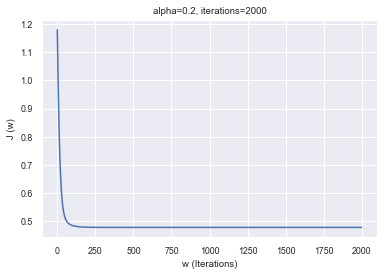

In [461]:

plt.plot(cost_1_4)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [332]:
pred_y_l_1_4=predict_log(x_train_log,beta_1_4)
pred_y_l_out_1_4=predict_log(x_test_log,beta_1_4)

In [333]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_4,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_4,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8095805739514349 

Out-sampling accuracy:  

0.812251655629139


## Logistic Regression-5 (0.5,2000)

In [334]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.5
iterations=2000
cost_log_1_5=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [0.9660791]
1 [0.89341795]
2 [0.83002559]
3 [0.77537588]
4 [0.7287928]
5 [0.68948657]
6 [0.65660054]
7 [0.62926237]
8 [0.60663106]
9 [0.58793277]
10 [0.57248246]
11 [0.55969203]
12 [0.54906838]
13 [0.54020521]
14 [0.53277176]
15 [0.52650096]
16 [0.52117817]
17 [0.5166313]
18 [0.5127224]
19 [0.50934074]
20 [0.50639728]
21 [0.50382014]
22 [0.50155108]
23 [0.49954271]
24 [0.49775629]
25 [0.49615995]
26 [0.49472737]
27 [0.49343667]
28 [0.49226958]
29 [0.49121073]
30 [0.49024715]
31 [0.4893678]
32 [0.48856325]
33 [0.48782543]
34 [0.48714733]
35 [0.48652289]
36 [0.48594683]
37 [0.48541452]
38 [0.48492188]
39 [0.48446532]
40 [0.48404165]
41 [0.48364802]
42 [0.4832819]
43 [0.48294103]
44 [0.48262334]
45 [0.48232701]
46 [0.48205037]
47 [0.48179191]
48 [0.48155026]
49 [0.48132416]
50 [0.48111249]
51 [0.48091421]
52 [0.48072835]
53 [0.48055405]
54 [0.48039051]
55 [0.48023698]
56 [0.48009279]
57 [0.4799573]
58 [0.47982995]
59 [0.47971019]
60 [0.47959753]
61 [0.47949151]
62 [0.47939171]
63 [0.479

497 [0.47767606]
498 [0.47767606]
499 [0.47767606]
500 [0.47767606]
501 [0.47767606]
502 [0.47767606]
503 [0.47767606]
504 [0.47767606]
505 [0.47767606]
506 [0.47767606]
507 [0.47767606]
508 [0.47767606]
509 [0.47767606]
510 [0.47767606]
511 [0.47767606]
512 [0.47767606]
513 [0.47767606]
514 [0.47767606]
515 [0.47767606]
516 [0.47767606]
517 [0.47767606]
518 [0.47767606]
519 [0.47767606]
520 [0.47767606]
521 [0.47767606]
522 [0.47767606]
523 [0.47767606]
524 [0.47767606]
525 [0.47767606]
526 [0.47767606]
527 [0.47767606]
528 [0.47767606]
529 [0.47767606]
530 [0.47767606]
531 [0.47767606]
532 [0.47767606]
533 [0.47767606]
534 [0.47767606]
535 [0.47767606]
536 [0.47767606]
537 [0.47767606]
538 [0.47767606]
539 [0.47767606]
540 [0.47767606]
541 [0.47767606]
542 [0.47767606]
543 [0.47767606]
544 [0.47767606]
545 [0.47767606]
546 [0.47767606]
547 [0.47767606]
548 [0.47767606]
549 [0.47767606]
550 [0.47767606]
551 [0.47767606]
552 [0.47767606]
553 [0.47767606]
554 [0.47767606]
555 [0.4776760

985 [0.47767606]
986 [0.47767606]
987 [0.47767606]
988 [0.47767606]
989 [0.47767606]
990 [0.47767606]
991 [0.47767606]
992 [0.47767606]
993 [0.47767606]
994 [0.47767606]
995 [0.47767606]
996 [0.47767606]
997 [0.47767606]
998 [0.47767606]
999 [0.47767606]
1000 [0.47767606]
1001 [0.47767606]
1002 [0.47767606]
1003 [0.47767606]
1004 [0.47767606]
1005 [0.47767606]
1006 [0.47767606]
1007 [0.47767606]
1008 [0.47767606]
1009 [0.47767606]
1010 [0.47767606]
1011 [0.47767606]
1012 [0.47767606]
1013 [0.47767606]
1014 [0.47767606]
1015 [0.47767606]
1016 [0.47767606]
1017 [0.47767606]
1018 [0.47767606]
1019 [0.47767606]
1020 [0.47767606]
1021 [0.47767606]
1022 [0.47767606]
1023 [0.47767606]
1024 [0.47767606]
1025 [0.47767606]
1026 [0.47767606]
1027 [0.47767606]
1028 [0.47767606]
1029 [0.47767606]
1030 [0.47767606]
1031 [0.47767606]
1032 [0.47767606]
1033 [0.47767606]
1034 [0.47767606]
1035 [0.47767606]
1036 [0.47767606]
1037 [0.47767606]
1038 [0.47767606]
1039 [0.47767606]
1040 [0.47767606]
1041 [0

1443 [0.47767606]
1444 [0.47767606]
1445 [0.47767606]
1446 [0.47767606]
1447 [0.47767606]
1448 [0.47767606]
1449 [0.47767606]
1450 [0.47767606]
1451 [0.47767606]
1452 [0.47767606]
1453 [0.47767606]
1454 [0.47767606]
1455 [0.47767606]
1456 [0.47767606]
1457 [0.47767606]
1458 [0.47767606]
1459 [0.47767606]
1460 [0.47767606]
1461 [0.47767606]
1462 [0.47767606]
1463 [0.47767606]
1464 [0.47767606]
1465 [0.47767606]
1466 [0.47767606]
1467 [0.47767606]
1468 [0.47767606]
1469 [0.47767606]
1470 [0.47767606]
1471 [0.47767606]
1472 [0.47767606]
1473 [0.47767606]
1474 [0.47767606]
1475 [0.47767606]
1476 [0.47767606]
1477 [0.47767606]
1478 [0.47767606]
1479 [0.47767606]
1480 [0.47767606]
1481 [0.47767606]
1482 [0.47767606]
1483 [0.47767606]
1484 [0.47767606]
1485 [0.47767606]
1486 [0.47767606]
1487 [0.47767606]
1488 [0.47767606]
1489 [0.47767606]
1490 [0.47767606]
1491 [0.47767606]
1492 [0.47767606]
1493 [0.47767606]
1494 [0.47767606]
1495 [0.47767606]
1496 [0.47767606]
1497 [0.47767606]
1498 [0.47

1901 [0.47767606]
1902 [0.47767606]
1903 [0.47767606]
1904 [0.47767606]
1905 [0.47767606]
1906 [0.47767606]
1907 [0.47767606]
1908 [0.47767606]
1909 [0.47767606]
1910 [0.47767606]
1911 [0.47767606]
1912 [0.47767606]
1913 [0.47767606]
1914 [0.47767606]
1915 [0.47767606]
1916 [0.47767606]
1917 [0.47767606]
1918 [0.47767606]
1919 [0.47767606]
1920 [0.47767606]
1921 [0.47767606]
1922 [0.47767606]
1923 [0.47767606]
1924 [0.47767606]
1925 [0.47767606]
1926 [0.47767606]
1927 [0.47767606]
1928 [0.47767606]
1929 [0.47767606]
1930 [0.47767606]
1931 [0.47767606]
1932 [0.47767606]
1933 [0.47767606]
1934 [0.47767606]
1935 [0.47767606]
1936 [0.47767606]
1937 [0.47767606]
1938 [0.47767606]
1939 [0.47767606]
1940 [0.47767606]
1941 [0.47767606]
1942 [0.47767606]
1943 [0.47767606]
1944 [0.47767606]
1945 [0.47767606]
1946 [0.47767606]
1947 [0.47767606]
1948 [0.47767606]
1949 [0.47767606]
1950 [0.47767606]
1951 [0.47767606]
1952 [0.47767606]
1953 [0.47767606]
1954 [0.47767606]
1955 [0.47767606]
1956 [0.47

In [335]:
beta_1_5=cost_log_1_5[1]
cost_1_5=cost_log_1_5[0]

Text(0.5, 1.0, 'alpha=0.5, iterations=2000')

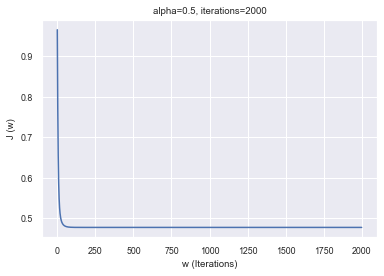

In [460]:

plt.plot(cost_1_5)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('alpha={}, iterations={}'.format(alpha,iterations))

In [337]:
pred_y_l_1_5=predict_log(x_train_log,beta_1_5)
pred_y_l_out_1_5=predict_log(x_test_log,beta_1_5)

In [338]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_5,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_5,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8095805739514349 

Out-sampling accuracy:  

0.812251655629139


## Logistic Regression-6 (0.8, 2000)--------------> BEST LOGISTIC MODEL

In [339]:
random.seed(44)
theta = np.random.rand(15,1)
theta[1:,]
alpha=0.8
iterations=2000
cost_log_1_6=gradient_descent(x_train_log,y_train_log,theta,alpha,iterations)

0 [0.94789208]
1 [0.84545222]
2 [0.76196704]
3 [0.6957299]
4 [0.64440236]
5 [0.60535153]
6 [0.57600314]
7 [0.5540869]
8 [0.53774132]
9 [0.52551388]
10 [0.51630765]
11 [0.50931165]
12 [0.50393418]
13 [0.49974688]
14 [0.49644075]
15 [0.4937929]
16 [0.4916422]
17 [0.48987158]
18 [0.48839539]
19 [0.48715046]
20 [0.48608968]
21 [0.48517757]
22 [0.48438705]
23 [0.4836972]
24 [0.48309161]
25 [0.4825573]
26 [0.48208382]
27 [0.48166267]
28 [0.48128685]
29 [0.48095056]
30 [0.48064891]
31 [0.48037774]
32 [0.48013354]
33 [0.47991325]
34 [0.47971424]
35 [0.47953422]
36 [0.47937118]
37 [0.47922336]
38 [0.47908921]
39 [0.47896735]
40 [0.47885658]
41 [0.47875579]
42 [0.47866403]
43 [0.47858043]
44 [0.47850422]
45 [0.4784347]
46 [0.47837126]
47 [0.47831332]
48 [0.4782604]
49 [0.47821202]
50 [0.47816779]
51 [0.47812733]
52 [0.4780903]
53 [0.4780564]
54 [0.47802536]
55 [0.47799692]
56 [0.47797086]
57 [0.47794697]
58 [0.47792506]
59 [0.47790497]
60 [0.47788654]
61 [0.47786963]
62 [0.4778541]
63 [0.4778398

492 [0.47767606]
493 [0.47767606]
494 [0.47767606]
495 [0.47767606]
496 [0.47767606]
497 [0.47767606]
498 [0.47767606]
499 [0.47767606]
500 [0.47767606]
501 [0.47767606]
502 [0.47767606]
503 [0.47767606]
504 [0.47767606]
505 [0.47767606]
506 [0.47767606]
507 [0.47767606]
508 [0.47767606]
509 [0.47767606]
510 [0.47767606]
511 [0.47767606]
512 [0.47767606]
513 [0.47767606]
514 [0.47767606]
515 [0.47767606]
516 [0.47767606]
517 [0.47767606]
518 [0.47767606]
519 [0.47767606]
520 [0.47767606]
521 [0.47767606]
522 [0.47767606]
523 [0.47767606]
524 [0.47767606]
525 [0.47767606]
526 [0.47767606]
527 [0.47767606]
528 [0.47767606]
529 [0.47767606]
530 [0.47767606]
531 [0.47767606]
532 [0.47767606]
533 [0.47767606]
534 [0.47767606]
535 [0.47767606]
536 [0.47767606]
537 [0.47767606]
538 [0.47767606]
539 [0.47767606]
540 [0.47767606]
541 [0.47767606]
542 [0.47767606]
543 [0.47767606]
544 [0.47767606]
545 [0.47767606]
546 [0.47767606]
547 [0.47767606]
548 [0.47767606]
549 [0.47767606]
550 [0.4776760

981 [0.47767606]
982 [0.47767606]
983 [0.47767606]
984 [0.47767606]
985 [0.47767606]
986 [0.47767606]
987 [0.47767606]
988 [0.47767606]
989 [0.47767606]
990 [0.47767606]
991 [0.47767606]
992 [0.47767606]
993 [0.47767606]
994 [0.47767606]
995 [0.47767606]
996 [0.47767606]
997 [0.47767606]
998 [0.47767606]
999 [0.47767606]
1000 [0.47767606]
1001 [0.47767606]
1002 [0.47767606]
1003 [0.47767606]
1004 [0.47767606]
1005 [0.47767606]
1006 [0.47767606]
1007 [0.47767606]
1008 [0.47767606]
1009 [0.47767606]
1010 [0.47767606]
1011 [0.47767606]
1012 [0.47767606]
1013 [0.47767606]
1014 [0.47767606]
1015 [0.47767606]
1016 [0.47767606]
1017 [0.47767606]
1018 [0.47767606]
1019 [0.47767606]
1020 [0.47767606]
1021 [0.47767606]
1022 [0.47767606]
1023 [0.47767606]
1024 [0.47767606]
1025 [0.47767606]
1026 [0.47767606]
1027 [0.47767606]
1028 [0.47767606]
1029 [0.47767606]
1030 [0.47767606]
1031 [0.47767606]
1032 [0.47767606]
1033 [0.47767606]
1034 [0.47767606]
1035 [0.47767606]
1036 [0.47767606]
1037 [0.477

1441 [0.47767606]
1442 [0.47767606]
1443 [0.47767606]
1444 [0.47767606]
1445 [0.47767606]
1446 [0.47767606]
1447 [0.47767606]
1448 [0.47767606]
1449 [0.47767606]
1450 [0.47767606]
1451 [0.47767606]
1452 [0.47767606]
1453 [0.47767606]
1454 [0.47767606]
1455 [0.47767606]
1456 [0.47767606]
1457 [0.47767606]
1458 [0.47767606]
1459 [0.47767606]
1460 [0.47767606]
1461 [0.47767606]
1462 [0.47767606]
1463 [0.47767606]
1464 [0.47767606]
1465 [0.47767606]
1466 [0.47767606]
1467 [0.47767606]
1468 [0.47767606]
1469 [0.47767606]
1470 [0.47767606]
1471 [0.47767606]
1472 [0.47767606]
1473 [0.47767606]
1474 [0.47767606]
1475 [0.47767606]
1476 [0.47767606]
1477 [0.47767606]
1478 [0.47767606]
1479 [0.47767606]
1480 [0.47767606]
1481 [0.47767606]
1482 [0.47767606]
1483 [0.47767606]
1484 [0.47767606]
1485 [0.47767606]
1486 [0.47767606]
1487 [0.47767606]
1488 [0.47767606]
1489 [0.47767606]
1490 [0.47767606]
1491 [0.47767606]
1492 [0.47767606]
1493 [0.47767606]
1494 [0.47767606]
1495 [0.47767606]
1496 [0.47

1900 [0.47767606]
1901 [0.47767606]
1902 [0.47767606]
1903 [0.47767606]
1904 [0.47767606]
1905 [0.47767606]
1906 [0.47767606]
1907 [0.47767606]
1908 [0.47767606]
1909 [0.47767606]
1910 [0.47767606]
1911 [0.47767606]
1912 [0.47767606]
1913 [0.47767606]
1914 [0.47767606]
1915 [0.47767606]
1916 [0.47767606]
1917 [0.47767606]
1918 [0.47767606]
1919 [0.47767606]
1920 [0.47767606]
1921 [0.47767606]
1922 [0.47767606]
1923 [0.47767606]
1924 [0.47767606]
1925 [0.47767606]
1926 [0.47767606]
1927 [0.47767606]
1928 [0.47767606]
1929 [0.47767606]
1930 [0.47767606]
1931 [0.47767606]
1932 [0.47767606]
1933 [0.47767606]
1934 [0.47767606]
1935 [0.47767606]
1936 [0.47767606]
1937 [0.47767606]
1938 [0.47767606]
1939 [0.47767606]
1940 [0.47767606]
1941 [0.47767606]
1942 [0.47767606]
1943 [0.47767606]
1944 [0.47767606]
1945 [0.47767606]
1946 [0.47767606]
1947 [0.47767606]
1948 [0.47767606]
1949 [0.47767606]
1950 [0.47767606]
1951 [0.47767606]
1952 [0.47767606]
1953 [0.47767606]
1954 [0.47767606]
1955 [0.47

In [542]:
beta_1_6=cost_log_1_6[1]
cost_1_6=cost_log_1_6[0]
beta_1_6

array([[ 1.32030179],
       [ 0.84605064],
       [ 0.15161247],
       [-0.90185887],
       [-0.76434505],
       [-0.05490093],
       [-0.06982137],
       [-0.01585568],
       [-0.08148353],
       [-0.14377474],
       [-0.32187518],
       [-0.02923028],
       [-0.40000505],
       [-0.07913085],
       [ 0.52168022]])

Text(0.5, 1.0, 'Best all features model\nalpha=0.8, iterations=2000')

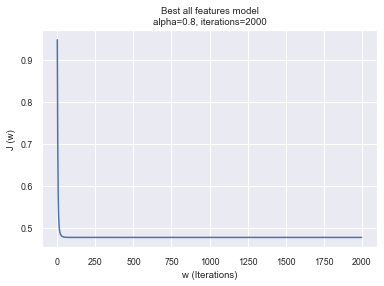

In [478]:
alpha=0.8
iterations=2000
plt.plot(cost_1_6)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Best all features model\nalpha={}, iterations={}'.format(alpha,iterations))

In [342]:
pred_y_l_1_6=predict_log(x_train_log,beta_1_6)
pred_y_l_out_1_6=predict_log(x_test_log,beta_1_6)

In [343]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_1_6,y_train_log)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_1_6,y_test_log)
print(accuracy_out)

In-sampling accuracy:  

0.8095805739514349 

Out-sampling accuracy:  

0.812251655629139


# EXPERIMENT 2

## Threshold convergence for Logistic Regression

In [434]:
#Gradient descent
def gradient_descent_expt2_log(X, y, params, alpha, total, threshold = 0):
    m = len(y)
    cost_history = []

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history.append(compute_cost(X, y, params))
        #print(i,cost_history[i][0])
        if i > 1 and (cost_history[len(cost_history)-2][0] - cost_history[len(cost_history)-1][0] <= threshold):
            break
    return (cost_history, params, i)

In [440]:
thresh = [10**-i for i in range(1,10)]
alphas = [0.001, 0.002, 0.003, 0.004, 0.005]
results_log = []
thetas_log = []


x = np.array(x_train_log)
y = np.array(y_train_log)
iters = 250000
i = 110

for threshold in thresh:
    for alpha in alphas:
        np.random.seed(i)
        theta = np.random.rand(x.shape[1],1)
#         thetas.append(theta)
        results_log.append([gradient_descent_expt2_log(x_train_log, y_train_log, theta, alpha, iters, threshold), alpha, threshold])
        i = i + 1
        print("threshold = {} , alpha = {}  and iterations = {}".format(threshold, alpha, results_log[len(results_log) - 1][0][2]))

threshold = 0.1 , alpha = 0.001  and iterations = 2
threshold = 0.1 , alpha = 0.002  and iterations = 2
threshold = 0.1 , alpha = 0.003  and iterations = 2
threshold = 0.1 , alpha = 0.004  and iterations = 2
threshold = 0.1 , alpha = 0.005  and iterations = 2
threshold = 0.01 , alpha = 0.001  and iterations = 2
threshold = 0.01 , alpha = 0.002  and iterations = 2
threshold = 0.01 , alpha = 0.003  and iterations = 2
threshold = 0.01 , alpha = 0.004  and iterations = 2
threshold = 0.01 , alpha = 0.005  and iterations = 2
threshold = 0.001 , alpha = 0.001  and iterations = 2
threshold = 0.001 , alpha = 0.002  and iterations = 2
threshold = 0.001 , alpha = 0.003  and iterations = 2
threshold = 0.001 , alpha = 0.004  and iterations = 2
threshold = 0.001 , alpha = 0.005  and iterations = 2
threshold = 0.0001 , alpha = 0.001  and iterations = 1396
threshold = 0.0001 , alpha = 0.002  and iterations = 2219
threshold = 0.0001 , alpha = 0.003  and iterations = 1744
threshold = 0.0001 , alpha = 0.

In [508]:
results_log_backup = results_log


with open('results_log.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % log for log in results_log)

## Threshold convergence for Linear Regression

In [514]:
#Implementing gradient Descent function
def gradesc_lin(x,y,theta,alpha,total, threshold):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    finalj=[]
    for i in range(total):
        x_theta = x@theta
        the2 = x_theta - y
        the3=xt @ the2
        theta = theta - alpha*(1/m)*the3
        j[i] = Cost(the2, m)
#         print (i,j[i][0])
        if i > 1 and (j[i-1][0]-j[i][0])< threshold:
            break
        #print('\n')
#         finalj=[]
    finalj= [theta, j, alpha, threshold, i]
    return finalj
    

In [515]:
thresh = [10**-i for i in range(2,7)]
alphas = [0.04, 0.05, 0.06]
results_lin = []
thetas_lin = []


x = np.array(x_train)
y = np.array(y_train)
iters = 250000
i = 250

for threshold in thresh:
    for alpha in alphas:
        np.random.seed(i)
        theta_expt2_lin = np.random.rand(x.shape[1],1)

        results_lin.append(gradesc_lin(x_train,y_train,theta_expt2_lin,alpha, iters, threshold))
        i = i + 1
        print("threshold = {} , alpha = {}  and iterations = {}".format(threshold, alpha, results_lin[len(results_lin) - 1][4]))
        
        
#theta_expt2_lin = np.random.rand(x_train.shape[1],1)


threshold = 0.01 , alpha = 0.04  and iterations = 37
threshold = 0.01 , alpha = 0.05  and iterations = 37
threshold = 0.01 , alpha = 0.06  and iterations = 33
threshold = 0.001 , alpha = 0.04  and iterations = 75
threshold = 0.001 , alpha = 0.05  and iterations = 66
threshold = 0.001 , alpha = 0.06  and iterations = 53
threshold = 0.0001 , alpha = 0.04  and iterations = 142
threshold = 0.0001 , alpha = 0.05  and iterations = 117
threshold = 0.0001 , alpha = 0.06  and iterations = 109
threshold = 1e-05 , alpha = 0.04  and iterations = 239
threshold = 1e-05 , alpha = 0.05  and iterations = 197
threshold = 1e-05 , alpha = 0.06  and iterations = 147
threshold = 1e-06 , alpha = 0.04  and iterations = 313
threshold = 1e-06 , alpha = 0.05  and iterations = 245
threshold = 1e-06 , alpha = 0.06  and iterations = 207


In [516]:
results_lin_backup = results_lin
# print(results_lin)
with open('results_lin.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % log for log in results_lin)

In [526]:
print(results_lin[0][2],'\n',results_lin[0][3],'\n',results_lin[0][4])

0.04 
 0.01 
 37


In [532]:
result_df = pd.DataFrame(columns = (["threshold", "alpha", "final cost", "iterations",'const', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']))
print(result_df)
for i in range(0,len(results_lin)):
#     print(results_lin[i][3])
#     print(results_lin[i][2])
#     print(results_lin[i][1][-1])
#     print(results_lin[i][4])
    result_df.loc[i] = [results_lin[i][3], results_lin[i][2], results_lin[i][1][-1], results_lin[i][4]] + [results_lin[i][0][j][0] for j in range(0,15)] #2nd last
result_df.head()


Empty DataFrame
Columns: [threshold, alpha, final cost, iterations, const, MWG, NWG, KWG, MDIMC, NDIMC, MDIMA, NDIMB, KWI, VWM, VWN, STRM, STRN, SA, SB]
Index: []


,threshold,alpha,final cost,iterations,const,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,0.010,0.04,0.0,37.0,0.116219,0.146004,0.103439,0.050137,0.056481,0.244930,0.172953,0.134824,0.419014,0.339054,0.161663,0.039982,0.129471,0.277025,0.161503
1,0.010,0.05,0.0,37.0,0.351232,0.138538,0.113454,-0.258433,-0.147217,0.213276,0.153598,0.118779,0.109478,0.249171,0.230505,0.238616,0.291279,0.269883,0.000655
2,0.010,0.06,0.0,33.0,0.118418,0.181185,0.038094,-0.017255,0.026327,0.100413,0.056719,0.234127,0.315602,0.304610,0.093689,0.030639,0.042458,0.258276,0.870622
3,0.001,0.04,0.0,75.0,0.270556,0.340558,0.113829,-0.232265,-0.263985,0.095689,0.002417,0.061531,0.120120,0.038832,0.077596,0.044154,0.105569,0.164347,0.748096
4,0.001,0.05,0.0,66.0,0.311718,0.236610,0.067262,-0.240420,-0.221800,0.055187,0.095030,0.049491,0.087313,0.153587,0.063827,0.028131,0.051230,0.069991,0.233041


In [533]:
def possibilities(x, y, results_df):
    x = np.asarray(x)
    y = np.asarray(y).T
    m_matrix = np.asarray(results_df.iloc[:,4:])
    prop = result_df.iloc[:,0:4]
    y_hat_all = m_matrix@x.T
    err = y-y_hat_all
    err_all = (np.sum(err**2, axis = 1)/len(x)).reshape([-1,1])
    print(err_all.shape)
    final_err_prop = pd.concat([prop, pd.DataFrame(err_all)], axis = 1, ignore_index=True)
    final_err_prop.columns = ["threshold", "alpha", "final cost", "iterations","RMSE"]
    return final_err_prop

In [534]:
final_errors_properties = possibilities(x_train, y_train, result_df)
final_errors_properties_test = possibilities(x_test, y_test, result_df)

(15, 1)
(15, 1)


In [535]:
final_errors_properties_filtered = final_errors_properties[final_errors_properties["threshold"] < 0.1]
final_errors_properties_filtered_test = final_errors_properties_test[final_errors_properties_test["threshold"] < 0.1]

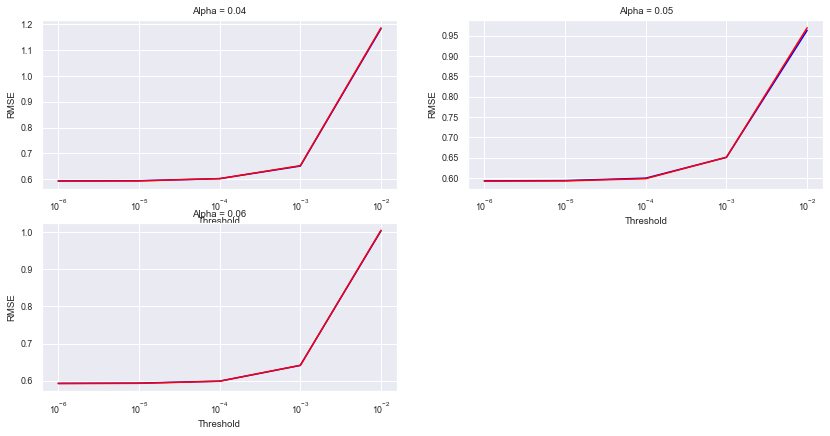

In [536]:
import pylab

fig = plt.figure(figsize = [14,18])
j = 1
for alpha in alphas:
    final_errors_properties_curr = final_errors_properties_filtered[final_errors_properties_filtered["alpha"] == alpha]
    final_errors_properties_curr_test = final_errors_properties_filtered_test[final_errors_properties_filtered_test["alpha"] == alpha]
    ax = fig.add_subplot(5,2, j)
    line, = ax.plot(final_errors_properties_curr['threshold'], final_errors_properties_curr['RMSE'], color='blue')
    line2, = ax.plot(final_errors_properties_curr_test['threshold'], final_errors_properties_curr_test['RMSE'], color='red')
    j = j + 1
    ax.set_xscale('log')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('RMSE')
    ax.set_title('Alpha = {}'.format(alpha))
#     pylab.show()


In [537]:
#Implementing gradient Descent function
def gradesc_lin_v2(x,y,theta,alpha,total, threshold):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    finalj=[]
    thetas = []
    thetas.append(theta)
    for i in range(total):
        x_theta = x@theta
        the2 = x_theta - y
        the3=xt @ the2
        theta = theta - alpha*(1/m)*the3
        thetas.append(theta)
        j[i] = Cost(the2, m)
#         print (i,j[i][0])
        if i > 1 and (j[i-1][0]-j[i][0])< threshold:
            break
        #print('\n')
#         finalj=[]
    finalj= [thetas, j, alpha, threshold, i]
    return finalj
    

In [538]:
np.random.seed(220)
x = np.array(x_train)
y = np.array(y_train)
m = np.random.rand(x.shape[1],1)
alpha = 0.05
iters = 3000


all_info = gradesc_lin_v2(x,y,m,alpha,iters, 10**-5)

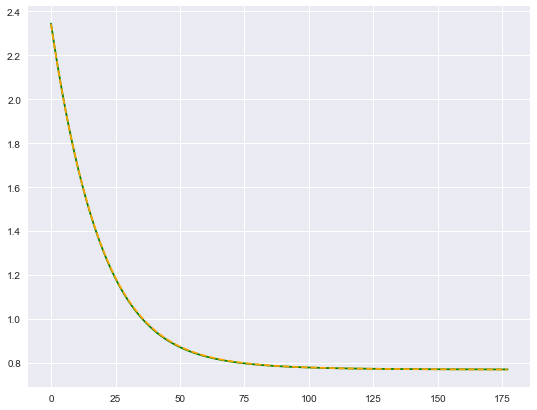

In [539]:
plt.figure(figsize=(9, 7))#, facecolor = "#e8f4f8")
import matplotlib as mpl
mpl.style.use("seaborn")

all_coefficients = [row.ravel() for row in all_info[0]]
all_coefficients = np.asarray(all_coefficients).T
y_all_possibles = x_train@all_coefficients
err = y_all_possibles - np.asarray(y_train)
train_rmse = np.sqrt(np.sum(err**2, axis = 0)/len(x_train))
plt.plot(train_rmse, color = 'green', linestyle='solid')

y_all_possibles_test = x_test@all_coefficients
err = y_all_possibles_test - np.asarray(y_test)
test_rmse = np.sqrt(np.sum(err**2, axis = 0)/len(x_test))
plt.plot(test_rmse, color = 'orange', linestyle='dashed')


Text(0.5, 1.0, 'No of iterations vs threshold\nAlpha = 0.04')

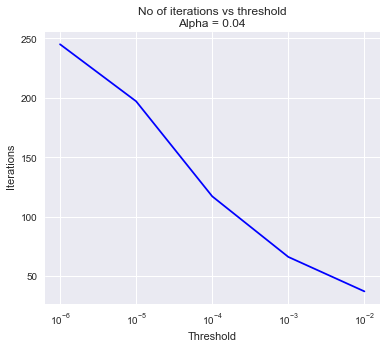

In [541]:
final_errors_properties_filtered_2 = final_errors_properties[final_errors_properties['alpha']==0.05]
final_errors_properties_filtered_2.shape

fig = plt.figure(figsize = [6,5])
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(final_errors_properties_filtered_2['threshold'], final_errors_properties_filtered_2['iterations'], color='blue')
# line2, = ax.plot(final_errors_properties_curr_test['threshold'], final_errors_properties_curr_test['RMSE'], color='red')
ax.set_xscale('log')
ax.set_xlabel('Threshold')
ax.set_ylabel(' Iterations')
ax.set_title('No of iterations vs threshold\nAlpha = 0.04')

In [418]:
gradient_descent_expt2(x_train_log, y_train_log, theta, alpha, 10, 0.1)

([array([[1.27448229]]), array([[1.27355806]]), array([[1.27263449]])],
 array([[0.50884022],
        [0.63030363],
        [0.6837488 ],
        [0.98214374],
        [0.86366267],
        [0.82632678],
        [0.71458846],
        [0.59641769],
        [0.85139043],
        [0.60184759],
        [0.13916472],
        [0.82484333],
        [0.415801  ],
        [0.53162307],
        [0.68806069]]),
 2)

# EXPERIMENT 3
### Pick eight features randomly and retrain your models only on these ten features. Compare train and test error results for the case of using your original set of features (14) and eight random features. Report the ten randomly selected features.

## Linear Regression

### I picked the last eight columns to compare with the model with all 14 features. 
### The model with all 14 features explains more variability of the data and has less error
### The Root mean square error and Mean Absolute error are very high for random modelas compared to model             with all 14 features
### The model with all 14 features is the best model

In [344]:
runtime3.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625


In [345]:
#Independent variables Matrix
x=runtime3.iloc[:,6:15]
xd = np.array(x)
x=xd[:,0:15]
x.shape
#matrix for dependent variable
runs = runtime["runavg"]
run=np.array(runs).reshape([-1,1])
run.shape
scaler = StandardScaler() 
norm_x3=scaler.fit_transform(x)
norm_y3=scaler.fit_transform(run)
norm_y3.shape

(241600, 1)

In [346]:
#Splitting the datset, into train and test
x_train3, x_test3, y_train3, y_test3=train_test_split(norm_x3, norm_y3, train_size=0.70,test_size=0.30, random_state=80)

In [355]:
random.seed(43)
theta_3 = np.random.rand(9,1)
theta_3[1:,]
theta_3.shape
alpha = .05
total = 1500
exp_3 = gradesc(x_train3,y_train3, theta_3, alpha, total)

0 [1.30116361]
1 [1.23812455]
2 [1.17921814]
3 [1.1241712]
4 [1.0727287]
5 [1.02465263]
6 [0.97972078]
7 [0.93772574]
8 [0.89847387]
9 [0.86178441]
10 [0.82748859]
11 [0.79542886]
12 [0.76545809]
13 [0.73743895]
14 [0.71124317]
15 [0.686751]
16 [0.66385062]
17 [0.6424376]
18 [0.62241442]
19 [0.60369002]
20 [0.58617934]
21 [0.56980295]
22 [0.55448665]
23 [0.54016116]
24 [0.52676173]
25 [0.51422791]
26 [0.50250322]
27 [0.4915349]
28 [0.48127365]
29 [0.47167344]
30 [0.46269123]
31 [0.45428684]
32 [0.4464227]
33 [0.43906371]
34 [0.4321771]
35 [0.42573221]
36 [0.41970041]
37 [0.41405494]
38 [0.40877078]
39 [0.40382455]
40 [0.39919442]
41 [0.39485996]
42 [0.39080207]
43 [0.38700292]
44 [0.38344582]
45 [0.38011517]
46 [0.37699641]
47 [0.37407588]
48 [0.37134086]
49 [0.36877942]
50 [0.36638042]
51 [0.36413343]
52 [0.36202872]
53 [0.36005716]
54 [0.35821025]
55 [0.35647999]
56 [0.35485894]
57 [0.35334013]
58 [0.35191702]
59 [0.35058352]
60 [0.34933391]
61 [0.34816286]
62 [0.34706536]
63 [0.3460

491 [0.33045385]
492 [0.33045385]
493 [0.33045385]
494 [0.33045385]
495 [0.33045385]
496 [0.33045385]
497 [0.33045385]
498 [0.33045385]
499 [0.33045385]
500 [0.33045385]
501 [0.33045385]
502 [0.33045385]
503 [0.33045385]
504 [0.33045385]
505 [0.33045385]
506 [0.33045385]
507 [0.33045385]
508 [0.33045385]
509 [0.33045385]
510 [0.33045385]
511 [0.33045385]
512 [0.33045385]
513 [0.33045385]
514 [0.33045385]
515 [0.33045385]
516 [0.33045385]
517 [0.33045385]
518 [0.33045385]
519 [0.33045385]
520 [0.33045385]
521 [0.33045385]
522 [0.33045385]
523 [0.33045385]
524 [0.33045385]
525 [0.33045385]
526 [0.33045385]
527 [0.33045385]
528 [0.33045385]
529 [0.33045385]
530 [0.33045385]
531 [0.33045385]
532 [0.33045385]
533 [0.33045385]
534 [0.33045385]
535 [0.33045385]
536 [0.33045385]
537 [0.33045385]
538 [0.33045385]
539 [0.33045385]
540 [0.33045385]
541 [0.33045385]
542 [0.33045385]
543 [0.33045385]
544 [0.33045385]
545 [0.33045385]
546 [0.33045385]
547 [0.33045385]
548 [0.33045385]
549 [0.3304538

973 [0.33045385]
974 [0.33045385]
975 [0.33045385]
976 [0.33045385]
977 [0.33045385]
978 [0.33045385]
979 [0.33045385]
980 [0.33045385]
981 [0.33045385]
982 [0.33045385]
983 [0.33045385]
984 [0.33045385]
985 [0.33045385]
986 [0.33045385]
987 [0.33045385]
988 [0.33045385]
989 [0.33045385]
990 [0.33045385]
991 [0.33045385]
992 [0.33045385]
993 [0.33045385]
994 [0.33045385]
995 [0.33045385]
996 [0.33045385]
997 [0.33045385]
998 [0.33045385]
999 [0.33045385]
1000 [0.33045385]
1001 [0.33045385]
1002 [0.33045385]
1003 [0.33045385]
1004 [0.33045385]
1005 [0.33045385]
1006 [0.33045385]
1007 [0.33045385]
1008 [0.33045385]
1009 [0.33045385]
1010 [0.33045385]
1011 [0.33045385]
1012 [0.33045385]
1013 [0.33045385]
1014 [0.33045385]
1015 [0.33045385]
1016 [0.33045385]
1017 [0.33045385]
1018 [0.33045385]
1019 [0.33045385]
1020 [0.33045385]
1021 [0.33045385]
1022 [0.33045385]
1023 [0.33045385]
1024 [0.33045385]
1025 [0.33045385]
1026 [0.33045385]
1027 [0.33045385]
1028 [0.33045385]
1029 [0.33045385]
1

1431 [0.33045385]
1432 [0.33045385]
1433 [0.33045385]
1434 [0.33045385]
1435 [0.33045385]
1436 [0.33045385]
1437 [0.33045385]
1438 [0.33045385]
1439 [0.33045385]
1440 [0.33045385]
1441 [0.33045385]
1442 [0.33045385]
1443 [0.33045385]
1444 [0.33045385]
1445 [0.33045385]
1446 [0.33045385]
1447 [0.33045385]
1448 [0.33045385]
1449 [0.33045385]
1450 [0.33045385]
1451 [0.33045385]
1452 [0.33045385]
1453 [0.33045385]
1454 [0.33045385]
1455 [0.33045385]
1456 [0.33045385]
1457 [0.33045385]
1458 [0.33045385]
1459 [0.33045385]
1460 [0.33045385]
1461 [0.33045385]
1462 [0.33045385]
1463 [0.33045385]
1464 [0.33045385]
1465 [0.33045385]
1466 [0.33045385]
1467 [0.33045385]
1468 [0.33045385]
1469 [0.33045385]
1470 [0.33045385]
1471 [0.33045385]
1472 [0.33045385]
1473 [0.33045385]
1474 [0.33045385]
1475 [0.33045385]
1476 [0.33045385]
1477 [0.33045385]
1478 [0.33045385]
1479 [0.33045385]
1480 [0.33045385]
1481 [0.33045385]
1482 [0.33045385]
1483 [0.33045385]
1484 [0.33045385]
1485 [0.33045385]
1486 [0.33

In [356]:
theta_3=exp_3[0]
cost_3=exp_3[1]

In [357]:
theta_3

array([[ 0.02472249],
       [ 0.03478219],
       [ 0.16625391],
       [ 0.1479919 ],
       [-0.01247092],
       [ 0.00141532],
       [ 0.05258461],
       [ 0.06331   ],
       [ 0.1464544 ]])

Text(0.5, 1.0, 'Random 8 features\nalpha=0.05, iterations=1500')

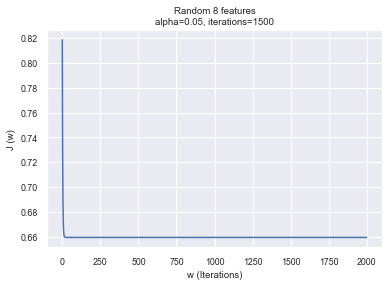

In [474]:
alpha = .05
total = 1500
plt.plot(cost_3)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Random 8 features\nalpha={}, iterations={}'.format(alpha,total))

In [359]:
pred_in_exp_3=predict(x_train3,theta_3)
pred_out_exp_3=predict(x_test3,theta_3)

In [360]:
print('In-sampling results','\n')
in_result=regression_results(y_train3,pred_in_exp_3)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test3,pred_out_exp_3)

In-sampling results 

R-square: 0.05673929485749152
Root mean square error: 0.9716758019353554
Mean absolute error: 0.5683284511566906

 Out-sampling results 

R-square: 0.055829936939173375
Root mean square error: 0.9706100940434971
Mean absolute error: 0.5688097207343217


In [361]:
Adjusted_R(y_train3,pred_in_exp_3,181200,9)

0.05669244157449416

### Logistic Regression

### Comparing the accuracy of the random model (Train: 0.8095,Test: 0.812252) VS all features model(Train:0.61,Test:0.61), best model is the model with all 14 features
### It implies the 14 features are significant to explain the variation in dependent variable more than the random 8 variables selected

In [362]:
runtime4=runtime2
runtime4.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg,Log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625,1


In [363]:
run_average = np.median(runtime4['runavg'])
print(run_average)
runtime4['Log_run'] =np.where(runtime4['runavg'] >= run_average, 1, 0)


69.79


In [364]:
x=runtime3.iloc[:,6:15]
xd = np.array(x)
x=xd[:,0:15]
x.shape
norm_xl_3=scaler.fit_transform(x)
b=runtime4.iloc[:,16:17]
b.describe()
norm_yl_3=np.array(b).reshape([-1,1])

In [365]:
#Splitting the datset, into train and test
x_train_log3, x_test_log3, y_train_log3, y_test_log3=train_test_split(norm_xl_3, norm_yl_3, train_size=0.70,test_size=0.30, random_state=80)

In [367]:
random.seed(43)
theta_3_2 = np.random.rand(9,1)
#theta=np.zeros((14,1))
theta_3_2[1:,]
theta_3_2.shape
alpha=0.8
iterations=2000
cost_log_3=gradient_descent(x_train_log3,y_train_log3,theta_3_2,alpha,iterations)

0 [0.81865466]
1 [0.7699333]
2 [0.73462244]
3 [0.70992204]
4 [0.69308649]
5 [0.68180085]
6 [0.67430387]
7 [0.66934214]
8 [0.66605926]
9 [0.66388342]
10 [0.66243726]
11 [0.66147287]
12 [0.66082749]
13 [0.66039408]
14 [0.66010201]
15 [0.65990455]
16 [0.65977063]
17 [0.65967952]
18 [0.65961737]
19 [0.65957485]
20 [0.65954569]
21 [0.65952563]
22 [0.65951181]
23 [0.65950225]
24 [0.65949564]
25 [0.65949104]
26 [0.65948785]
27 [0.65948562]
28 [0.65948406]
29 [0.65948298]
30 [0.65948221]
31 [0.65948167]
32 [0.6594813]
33 [0.65948103]
34 [0.65948084]
35 [0.65948071]
36 [0.65948062]
37 [0.65948055]
38 [0.6594805]
39 [0.65948047]
40 [0.65948044]
41 [0.65948043]
42 [0.65948041]
43 [0.6594804]
44 [0.6594804]
45 [0.65948039]
46 [0.65948039]
47 [0.65948039]
48 [0.65948039]
49 [0.65948039]
50 [0.65948038]
51 [0.65948038]
52 [0.65948038]
53 [0.65948038]
54 [0.65948038]
55 [0.65948038]
56 [0.65948038]
57 [0.65948038]
58 [0.65948038]
59 [0.65948038]
60 [0.65948038]
61 [0.65948038]
62 [0.65948038]
63 [0.6

494 [0.65948038]
495 [0.65948038]
496 [0.65948038]
497 [0.65948038]
498 [0.65948038]
499 [0.65948038]
500 [0.65948038]
501 [0.65948038]
502 [0.65948038]
503 [0.65948038]
504 [0.65948038]
505 [0.65948038]
506 [0.65948038]
507 [0.65948038]
508 [0.65948038]
509 [0.65948038]
510 [0.65948038]
511 [0.65948038]
512 [0.65948038]
513 [0.65948038]
514 [0.65948038]
515 [0.65948038]
516 [0.65948038]
517 [0.65948038]
518 [0.65948038]
519 [0.65948038]
520 [0.65948038]
521 [0.65948038]
522 [0.65948038]
523 [0.65948038]
524 [0.65948038]
525 [0.65948038]
526 [0.65948038]
527 [0.65948038]
528 [0.65948038]
529 [0.65948038]
530 [0.65948038]
531 [0.65948038]
532 [0.65948038]
533 [0.65948038]
534 [0.65948038]
535 [0.65948038]
536 [0.65948038]
537 [0.65948038]
538 [0.65948038]
539 [0.65948038]
540 [0.65948038]
541 [0.65948038]
542 [0.65948038]
543 [0.65948038]
544 [0.65948038]
545 [0.65948038]
546 [0.65948038]
547 [0.65948038]
548 [0.65948038]
549 [0.65948038]
550 [0.65948038]
551 [0.65948038]
552 [0.6594803

983 [0.65948038]
984 [0.65948038]
985 [0.65948038]
986 [0.65948038]
987 [0.65948038]
988 [0.65948038]
989 [0.65948038]
990 [0.65948038]
991 [0.65948038]
992 [0.65948038]
993 [0.65948038]
994 [0.65948038]
995 [0.65948038]
996 [0.65948038]
997 [0.65948038]
998 [0.65948038]
999 [0.65948038]
1000 [0.65948038]
1001 [0.65948038]
1002 [0.65948038]
1003 [0.65948038]
1004 [0.65948038]
1005 [0.65948038]
1006 [0.65948038]
1007 [0.65948038]
1008 [0.65948038]
1009 [0.65948038]
1010 [0.65948038]
1011 [0.65948038]
1012 [0.65948038]
1013 [0.65948038]
1014 [0.65948038]
1015 [0.65948038]
1016 [0.65948038]
1017 [0.65948038]
1018 [0.65948038]
1019 [0.65948038]
1020 [0.65948038]
1021 [0.65948038]
1022 [0.65948038]
1023 [0.65948038]
1024 [0.65948038]
1025 [0.65948038]
1026 [0.65948038]
1027 [0.65948038]
1028 [0.65948038]
1029 [0.65948038]
1030 [0.65948038]
1031 [0.65948038]
1032 [0.65948038]
1033 [0.65948038]
1034 [0.65948038]
1035 [0.65948038]
1036 [0.65948038]
1037 [0.65948038]
1038 [0.65948038]
1039 [0.6

1440 [0.65948038]
1441 [0.65948038]
1442 [0.65948038]
1443 [0.65948038]
1444 [0.65948038]
1445 [0.65948038]
1446 [0.65948038]
1447 [0.65948038]
1448 [0.65948038]
1449 [0.65948038]
1450 [0.65948038]
1451 [0.65948038]
1452 [0.65948038]
1453 [0.65948038]
1454 [0.65948038]
1455 [0.65948038]
1456 [0.65948038]
1457 [0.65948038]
1458 [0.65948038]
1459 [0.65948038]
1460 [0.65948038]
1461 [0.65948038]
1462 [0.65948038]
1463 [0.65948038]
1464 [0.65948038]
1465 [0.65948038]
1466 [0.65948038]
1467 [0.65948038]
1468 [0.65948038]
1469 [0.65948038]
1470 [0.65948038]
1471 [0.65948038]
1472 [0.65948038]
1473 [0.65948038]
1474 [0.65948038]
1475 [0.65948038]
1476 [0.65948038]
1477 [0.65948038]
1478 [0.65948038]
1479 [0.65948038]
1480 [0.65948038]
1481 [0.65948038]
1482 [0.65948038]
1483 [0.65948038]
1484 [0.65948038]
1485 [0.65948038]
1486 [0.65948038]
1487 [0.65948038]
1488 [0.65948038]
1489 [0.65948038]
1490 [0.65948038]
1491 [0.65948038]
1492 [0.65948038]
1493 [0.65948038]
1494 [0.65948038]
1495 [0.65

1903 [0.65948038]
1904 [0.65948038]
1905 [0.65948038]
1906 [0.65948038]
1907 [0.65948038]
1908 [0.65948038]
1909 [0.65948038]
1910 [0.65948038]
1911 [0.65948038]
1912 [0.65948038]
1913 [0.65948038]
1914 [0.65948038]
1915 [0.65948038]
1916 [0.65948038]
1917 [0.65948038]
1918 [0.65948038]
1919 [0.65948038]
1920 [0.65948038]
1921 [0.65948038]
1922 [0.65948038]
1923 [0.65948038]
1924 [0.65948038]
1925 [0.65948038]
1926 [0.65948038]
1927 [0.65948038]
1928 [0.65948038]
1929 [0.65948038]
1930 [0.65948038]
1931 [0.65948038]
1932 [0.65948038]
1933 [0.65948038]
1934 [0.65948038]
1935 [0.65948038]
1936 [0.65948038]
1937 [0.65948038]
1938 [0.65948038]
1939 [0.65948038]
1940 [0.65948038]
1941 [0.65948038]
1942 [0.65948038]
1943 [0.65948038]
1944 [0.65948038]
1945 [0.65948038]
1946 [0.65948038]
1947 [0.65948038]
1948 [0.65948038]
1949 [0.65948038]
1950 [0.65948038]
1951 [0.65948038]
1952 [0.65948038]
1953 [0.65948038]
1954 [0.65948038]
1955 [0.65948038]
1956 [0.65948038]
1957 [0.65948038]
1958 [0.65

In [368]:
beta_3=cost_log_3[1]
cost_3=cost_log_3[0]

In [369]:
beta_3

array([[-0.03487053],
       [-0.002364  ],
       [ 0.38231443],
       [ 0.17130757],
       [-0.21706124],
       [-0.02184361],
       [-0.26586031],
       [-0.05559572],
       [ 0.68933441]])

Text(0.5, 1.0, 'Random 8 features\nalpha=0.8, iterations=2000')

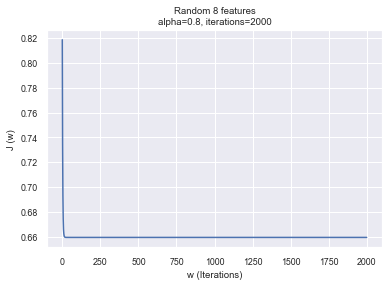

In [476]:
alpha=0.8
iterations=2000
plt.plot(cost_3)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Random 8 features\nalpha={}, iterations={}'.format(alpha,iterations))

In [373]:
pred_y_l_3=predict_log(x_train_log3,beta_3)
pred_y_l_out_3=predict_log(x_test_log3,beta_3)

In [374]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_3,y_train_log3)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_3,y_test_log3)
print(accuracy_out)

In-sampling accuracy:  

0.6102412488174077 

Out-sampling accuracy:  

0.6115618101545254


# EXPERIMENT 4
### Now pick eight features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

## Linear Regression

### The R-square of model with 14 features is slightly higher than best 8 features model
### Both have similar RMSE and MAE
### Both model perform equally good but the best model is the one with 8 features as it takes lesser information to predict

In [383]:
runtime5=runtime
runtime5.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg,Log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625,1


In [384]:
x=runtime5.drop(['KWI','VWN','STRM','STRN','SA','SB','runavg','Log_run'],axis=1)
y=runtime5.iloc[:,15:16]
x_arr=np.array(x)
y_arr=np.array(y)
scaler = StandardScaler() 
X=scaler.fit_transform(x_arr)
Y=scaler.fit_transform(y_arr)

In [385]:
#Splitting the datset, into train and test
x_train_4, x_test_4, y_train_4, y_test_4=train_test_split(X,Y,train_size=0.70,test_size=0.30, random_state=80)

In [386]:
random.seed(43)
theta_4_1 = np.random.rand(9,1)
#theta=np.zeros((14,1))
theta_4_1[1:,]
alpha=0.05
iterations=1500
exp_4=gradesc(x_train_4,y_train_4,theta_4_1,alpha,iterations)

0 [1.4097813]
1 [1.31053933]
2 [1.21998316]
3 [1.13732991]
4 [1.06186839]
5 [0.99295245]
6 [0.929995]
7 [0.87246251]
8 [0.81987016]
9 [0.77177725]
10 [0.72778324]
11 [0.68752397]
12 [0.65066837]
13 [0.61691538]
14 [0.58599122]
15 [0.5576469]
16 [0.53165589]
17 [0.50781212]
18 [0.48592808]
19 [0.46583313]
20 [0.44737194]
21 [0.43040313]
22 [0.41479796]
23 [0.4004392]
24 [0.38722005]
25 [0.37504325]
26 [0.36382016]
27 [0.35346999]
28 [0.34391912]
29 [0.33510039]
30 [0.3269526]
31 [0.31941987]
32 [0.31245126]
33 [0.30600024]
34 [0.30002438]
35 [0.29448488]
36 [0.28934635]
37 [0.28457641]
38 [0.28014551]
39 [0.2760266]
40 [0.27219496]
41 [0.26862796]
42 [0.26530491]
43 [0.26220684]
44 [0.2593164]
45 [0.25661768]
46 [0.2540961]
47 [0.2517383]
48 [0.24953201]
49 [0.24746598]
50 [0.24552988]
51 [0.2437142]
52 [0.24201023]
53 [0.24040995]
54 [0.23890597]
55 [0.23749151]
56 [0.23616031]
57 [0.2349066]
58 [0.23372508]
59 [0.23261084]
60 [0.23155935]
61 [0.23056645]
62 [0.22962827]
63 [0.22874125

492 [0.21042274]
493 [0.21042274]
494 [0.21042274]
495 [0.21042274]
496 [0.21042274]
497 [0.21042274]
498 [0.21042274]
499 [0.21042274]
500 [0.21042274]
501 [0.21042274]
502 [0.21042274]
503 [0.21042274]
504 [0.21042274]
505 [0.21042274]
506 [0.21042274]
507 [0.21042274]
508 [0.21042274]
509 [0.21042274]
510 [0.21042274]
511 [0.21042274]
512 [0.21042274]
513 [0.21042274]
514 [0.21042274]
515 [0.21042274]
516 [0.21042274]
517 [0.21042274]
518 [0.21042274]
519 [0.21042274]
520 [0.21042274]
521 [0.21042274]
522 [0.21042274]
523 [0.21042274]
524 [0.21042274]
525 [0.21042274]
526 [0.21042274]
527 [0.21042274]
528 [0.21042274]
529 [0.21042274]
530 [0.21042274]
531 [0.21042274]
532 [0.21042274]
533 [0.21042274]
534 [0.21042274]
535 [0.21042274]
536 [0.21042274]
537 [0.21042274]
538 [0.21042274]
539 [0.21042274]
540 [0.21042274]
541 [0.21042274]
542 [0.21042274]
543 [0.21042274]
544 [0.21042274]
545 [0.21042274]
546 [0.21042274]
547 [0.21042274]
548 [0.21042274]
549 [0.21042274]
550 [0.2104227

975 [0.21042274]
976 [0.21042274]
977 [0.21042274]
978 [0.21042274]
979 [0.21042274]
980 [0.21042274]
981 [0.21042274]
982 [0.21042274]
983 [0.21042274]
984 [0.21042274]
985 [0.21042274]
986 [0.21042274]
987 [0.21042274]
988 [0.21042274]
989 [0.21042274]
990 [0.21042274]
991 [0.21042274]
992 [0.21042274]
993 [0.21042274]
994 [0.21042274]
995 [0.21042274]
996 [0.21042274]
997 [0.21042274]
998 [0.21042274]
999 [0.21042274]
1000 [0.21042274]
1001 [0.21042274]
1002 [0.21042274]
1003 [0.21042274]
1004 [0.21042274]
1005 [0.21042274]
1006 [0.21042274]
1007 [0.21042274]
1008 [0.21042274]
1009 [0.21042274]
1010 [0.21042274]
1011 [0.21042274]
1012 [0.21042274]
1013 [0.21042274]
1014 [0.21042274]
1015 [0.21042274]
1016 [0.21042274]
1017 [0.21042274]
1018 [0.21042274]
1019 [0.21042274]
1020 [0.21042274]
1021 [0.21042274]
1022 [0.21042274]
1023 [0.21042274]
1024 [0.21042274]
1025 [0.21042274]
1026 [0.21042274]
1027 [0.21042274]
1028 [0.21042274]
1029 [0.21042274]
1030 [0.21042274]
1031 [0.21042274]

1433 [0.21042274]
1434 [0.21042274]
1435 [0.21042274]
1436 [0.21042274]
1437 [0.21042274]
1438 [0.21042274]
1439 [0.21042274]
1440 [0.21042274]
1441 [0.21042274]
1442 [0.21042274]
1443 [0.21042274]
1444 [0.21042274]
1445 [0.21042274]
1446 [0.21042274]
1447 [0.21042274]
1448 [0.21042274]
1449 [0.21042274]
1450 [0.21042274]
1451 [0.21042274]
1452 [0.21042274]
1453 [0.21042274]
1454 [0.21042274]
1455 [0.21042274]
1456 [0.21042274]
1457 [0.21042274]
1458 [0.21042274]
1459 [0.21042274]
1460 [0.21042274]
1461 [0.21042274]
1462 [0.21042274]
1463 [0.21042274]
1464 [0.21042274]
1465 [0.21042274]
1466 [0.21042274]
1467 [0.21042274]
1468 [0.21042274]
1469 [0.21042274]
1470 [0.21042274]
1471 [0.21042274]
1472 [0.21042274]
1473 [0.21042274]
1474 [0.21042274]
1475 [0.21042274]
1476 [0.21042274]
1477 [0.21042274]
1478 [0.21042274]
1479 [0.21042274]
1480 [0.21042274]
1481 [0.21042274]
1482 [0.21042274]
1483 [0.21042274]
1484 [0.21042274]
1485 [0.21042274]
1486 [0.21042274]
1487 [0.21042274]
1488 [0.21

In [387]:
theta_exp_4_1=exp_4[0]
cost_exp_4_1=exp_4[1]

In [388]:
theta_exp_4_1

array([[ 0.38371508],
       [ 0.34640572],
       [ 0.11237928],
       [-0.35713977],
       [-0.34807536],
       [ 0.02841085],
       [ 0.03105758],
       [-0.00675698],
       [ 0.32033638]])

Text(0.5, 1.0, 'Best 8 features\nalpha=0.05, iterations=1500')

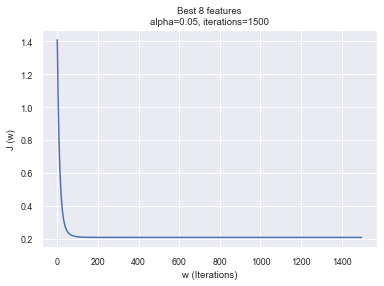

In [480]:
alpha=0.05
iterations=1500
plt.plot(cost_exp_4_1)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Best 8 features\nalpha={}, iterations={}'.format(alpha,iterations))

In [390]:
pred_in_exp_4_1=predict(x_train_4,theta_exp_4_1)
pred_out_exp_4_1=predict(x_test_4,theta_exp_4_1)

In [391]:
print('In-sampling results','\n')
in_result=regression_results(y_train_4,pred_in_exp_4_1)
print('\n','Out-sampling results','\n')
out_result=regression_results(y_test_4,pred_out_exp_4_1)

In-sampling results 

R-square: 0.39936091089853154
Root mean square error: 0.7753759249127089
Mean absolute error: 0.476469974966811

 Out-sampling results 

R-square: 0.39897789648856585
Root mean square error: 0.7743992301635123
Mean absolute error: 0.47496439116598294


In [393]:
Adjusted_R(y_train_4,pred_in_exp_4_1,169120,9)
# x_train_4.shape

0.3993289450076799

## Logistic regression

### The best model is with higher accuracy and lesser features
### Therefore, the 8 feature model is the best with accuracy (Train: 0.82, Test: 0.8233) as compared to all feature model (Train:0.81, Test:0.81)

In [395]:
runtime6=runtime2
runtime6.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,runavg,Log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,118.6625,1


In [396]:
run_average = np.median(runtime6['runavg'])
print(run_average)
runtime6['Log_run'] =np.where(runtime6['runavg'] >= run_average, 1, 0)
#runtime2 = runtime2.drop(['runavg'], axis = 1)

69.79


In [397]:
x_log=runtime6.drop(['KWI','VWN','STRM','STRN','SA','SB','runavg','Log_run'],axis=1)
y_log=runtime6.iloc[:,16:17]
x_arr_log=np.array(x_log)
Y_log=np.array(y_log)
scaler = StandardScaler() 
X_log=scaler.fit_transform(x_arr_log)

In [398]:
#Splitting the datset, into train and test
x_train_4l, x_test_4l, y_train_4l, y_test_4l=train_test_split(X_log,Y_log,train_size=0.75,test_size=0.25, random_state=8)

In [399]:
random.seed(43)
theta_4_log = np.random.rand(9,1)
theta_4_log[1:,]
theta_4_log.shape
alpha=0.8
iterations=2000
cost_log_4=gradient_descent(x_train_4l,y_train_4l,theta_4_log,alpha,iterations)

0 [0.78143514]
1 [0.70095518]
2 [0.64322179]
3 [0.60311197]
4 [0.57570192]
5 [0.55698751]
6 [0.54405886]
7 [0.53494154]
8 [0.52834458]
9 [0.52343707]
10 [0.51968499]
11 [0.51674241]
12 [0.51438204]
13 [0.5124517]
14 [0.51084732]
15 [0.509496]
16 [0.50834544]
17 [0.50735717]
18 [0.50650224]
19 [0.50575834]
20 [0.50510797]
21 [0.50453711]
22 [0.50403439]
23 [0.50359043]
24 [0.50319742]
25 [0.5028488]
26 [0.50253897]
27 [0.50226319]
28 [0.50201735]
29 [0.50179793]
30 [0.50160184]
31 [0.50142643]
32 [0.50126936]
33 [0.50112857]
34 [0.50100229]
35 [0.50088891]
36 [0.50078706]
37 [0.5006955]
38 [0.50061312]
39 [0.50053898]
40 [0.5004722]
41 [0.50041203]
42 [0.50035778]
43 [0.50030885]
44 [0.5002647]
45 [0.50022483]
46 [0.50018883]
47 [0.50015631]
48 [0.50012691]
49 [0.50010033]
50 [0.50007629]
51 [0.50005454]
52 [0.50003486]
53 [0.50001705]
54 [0.50000092]
55 [0.49998631]
56 [0.49997308]
57 [0.49996109]
58 [0.49995022]
59 [0.49994037]
60 [0.49993143]
61 [0.49992333]
62 [0.49991599]
63 [0.499

496 [0.49984318]
497 [0.49984318]
498 [0.49984318]
499 [0.49984318]
500 [0.49984318]
501 [0.49984318]
502 [0.49984318]
503 [0.49984318]
504 [0.49984318]
505 [0.49984318]
506 [0.49984318]
507 [0.49984318]
508 [0.49984318]
509 [0.49984318]
510 [0.49984318]
511 [0.49984318]
512 [0.49984318]
513 [0.49984318]
514 [0.49984318]
515 [0.49984318]
516 [0.49984318]
517 [0.49984318]
518 [0.49984318]
519 [0.49984318]
520 [0.49984318]
521 [0.49984318]
522 [0.49984318]
523 [0.49984318]
524 [0.49984318]
525 [0.49984318]
526 [0.49984318]
527 [0.49984318]
528 [0.49984318]
529 [0.49984318]
530 [0.49984318]
531 [0.49984318]
532 [0.49984318]
533 [0.49984318]
534 [0.49984318]
535 [0.49984318]
536 [0.49984318]
537 [0.49984318]
538 [0.49984318]
539 [0.49984318]
540 [0.49984318]
541 [0.49984318]
542 [0.49984318]
543 [0.49984318]
544 [0.49984318]
545 [0.49984318]
546 [0.49984318]
547 [0.49984318]
548 [0.49984318]
549 [0.49984318]
550 [0.49984318]
551 [0.49984318]
552 [0.49984318]
553 [0.49984318]
554 [0.4998431

978 [0.49984318]
979 [0.49984318]
980 [0.49984318]
981 [0.49984318]
982 [0.49984318]
983 [0.49984318]
984 [0.49984318]
985 [0.49984318]
986 [0.49984318]
987 [0.49984318]
988 [0.49984318]
989 [0.49984318]
990 [0.49984318]
991 [0.49984318]
992 [0.49984318]
993 [0.49984318]
994 [0.49984318]
995 [0.49984318]
996 [0.49984318]
997 [0.49984318]
998 [0.49984318]
999 [0.49984318]
1000 [0.49984318]
1001 [0.49984318]
1002 [0.49984318]
1003 [0.49984318]
1004 [0.49984318]
1005 [0.49984318]
1006 [0.49984318]
1007 [0.49984318]
1008 [0.49984318]
1009 [0.49984318]
1010 [0.49984318]
1011 [0.49984318]
1012 [0.49984318]
1013 [0.49984318]
1014 [0.49984318]
1015 [0.49984318]
1016 [0.49984318]
1017 [0.49984318]
1018 [0.49984318]
1019 [0.49984318]
1020 [0.49984318]
1021 [0.49984318]
1022 [0.49984318]
1023 [0.49984318]
1024 [0.49984318]
1025 [0.49984318]
1026 [0.49984318]
1027 [0.49984318]
1028 [0.49984318]
1029 [0.49984318]
1030 [0.49984318]
1031 [0.49984318]
1032 [0.49984318]
1033 [0.49984318]
1034 [0.499843

1439 [0.49984318]
1440 [0.49984318]
1441 [0.49984318]
1442 [0.49984318]
1443 [0.49984318]
1444 [0.49984318]
1445 [0.49984318]
1446 [0.49984318]
1447 [0.49984318]
1448 [0.49984318]
1449 [0.49984318]
1450 [0.49984318]
1451 [0.49984318]
1452 [0.49984318]
1453 [0.49984318]
1454 [0.49984318]
1455 [0.49984318]
1456 [0.49984318]
1457 [0.49984318]
1458 [0.49984318]
1459 [0.49984318]
1460 [0.49984318]
1461 [0.49984318]
1462 [0.49984318]
1463 [0.49984318]
1464 [0.49984318]
1465 [0.49984318]
1466 [0.49984318]
1467 [0.49984318]
1468 [0.49984318]
1469 [0.49984318]
1470 [0.49984318]
1471 [0.49984318]
1472 [0.49984318]
1473 [0.49984318]
1474 [0.49984318]
1475 [0.49984318]
1476 [0.49984318]
1477 [0.49984318]
1478 [0.49984318]
1479 [0.49984318]
1480 [0.49984318]
1481 [0.49984318]
1482 [0.49984318]
1483 [0.49984318]
1484 [0.49984318]
1485 [0.49984318]
1486 [0.49984318]
1487 [0.49984318]
1488 [0.49984318]
1489 [0.49984318]
1490 [0.49984318]
1491 [0.49984318]
1492 [0.49984318]
1493 [0.49984318]
1494 [0.49

1894 [0.49984318]
1895 [0.49984318]
1896 [0.49984318]
1897 [0.49984318]
1898 [0.49984318]
1899 [0.49984318]
1900 [0.49984318]
1901 [0.49984318]
1902 [0.49984318]
1903 [0.49984318]
1904 [0.49984318]
1905 [0.49984318]
1906 [0.49984318]
1907 [0.49984318]
1908 [0.49984318]
1909 [0.49984318]
1910 [0.49984318]
1911 [0.49984318]
1912 [0.49984318]
1913 [0.49984318]
1914 [0.49984318]
1915 [0.49984318]
1916 [0.49984318]
1917 [0.49984318]
1918 [0.49984318]
1919 [0.49984318]
1920 [0.49984318]
1921 [0.49984318]
1922 [0.49984318]
1923 [0.49984318]
1924 [0.49984318]
1925 [0.49984318]
1926 [0.49984318]
1927 [0.49984318]
1928 [0.49984318]
1929 [0.49984318]
1930 [0.49984318]
1931 [0.49984318]
1932 [0.49984318]
1933 [0.49984318]
1934 [0.49984318]
1935 [0.49984318]
1936 [0.49984318]
1937 [0.49984318]
1938 [0.49984318]
1939 [0.49984318]
1940 [0.49984318]
1941 [0.49984318]
1942 [0.49984318]
1943 [0.49984318]
1944 [0.49984318]
1945 [0.49984318]
1946 [0.49984318]
1947 [0.49984318]
1948 [0.49984318]
1949 [0.49

In [400]:
beta_exp4=cost_log_4[1]
cost_exp4=cost_log_4[0]

Text(0.5, 1.0, 'Best 8 features\nalpha=0.8, iterations=2000')

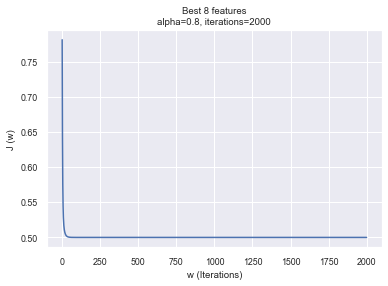

In [481]:
alpha=0.8
iterations=2000
plt.plot(cost_exp4)
plt.ylabel('J (w)')
plt.xlabel('w (Iterations)')
plt.title('Best 8 features\nalpha={}, iterations={}'.format(alpha,iterations))

In [402]:
pred_y_l_4=predict_log(x_train_4l,beta_exp4)
pred_y_l_out_4=predict_log(x_test_4l,beta_exp4)

In [403]:
print('In-sampling accuracy: ','\n')
accuracy_in=accuracy(pred_y_l_4,y_train_4l)
print(accuracy_in,'\n')
print('Out-sampling accuracy: ','\n')
accuracy_out=accuracy(pred_y_l_out_4,y_test_4l)
print(accuracy_out)

In-sampling accuracy:  

0.8220695364238411 

Out-sampling accuracy:  

0.8233112582781457
